## Students' names: Aizhan Borubaeva, Ekaterina Lobanchenko, Mehmet Sundu

## Project's title: Unlocking the Melodies: Analyzing Factors Influencing Top Spotify Songs in 2023

The goal of this project is to identify characteristics that can enhance a song's potential for popularity and ensure its sustained success in music charts. As there are many factors that can influence a song's success, like viral trends on social media, marketing campaigns, celebrity endorsement, and others, we mainly concentrate on musical composition in our analysis. By delving into the nuances of rhythm, mood, and the complexity of instrumentation and lyrical content, we aim to provide artists with valuable insights. Understanding the optimal combination of these musical components could unlock the formula for creating hit songs that captivate listeners and achieve enduring success.

Source of the dataset: https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import graphviz 
import sklearn

import seaborn as sns
%matplotlib inline

from matplotlib_inline.backend_inline import set_matplotlib_formats

set_matplotlib_formats('retina')

In [2]:
import pandas as pd
df = pd.read_csv("spotify_2023.csv", encoding='ISO-8859-1')
df.shape

(953, 24)

In [4]:
df.to_csv("Spotify_utf8.csv", index=False, encoding='utf-8')
df = pd.read_csv("Spotify_utf8.csv")

In [5]:
df.head()

track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703                  43  ...  125   B  Major   
1                 48  133716286                  48  ...   92  C#  Major   
2                113  140003974                  94  ...  138   F  Major   
3                100  800840817                 116  ...  170   A  Major   
4                 50  303236322                  84  ...  144   A  Minor   

  danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
0             80         89       83             31                   0   
1             71         61       74              7                   0   
2             51         32       53             17                   0   
3             55         58       72             11                   0   
4             65         23       80             14                  63   

   liveness_%  speechiness_%  
0           8              4  
1          10              4  
2          31              6  
3          11             15  
4          11              6  

[5 rows x 24 columns]

Initial dataset consists of 24 features:
track_name: Name of the song
artist(s)_name: Name of the artist(s) of the song
artist_count: Number of artists contributing to the song
released_year: Year when the song was released
released_month: Month when the song was released
released_day: Day of the month when the song was released
in_spotify_playlists: Number of Spotify playlists the song is included in
in_spotify_charts: Number of times the song was included in the chart
streams: Total number of streams on Spotify
in_apple_playlists: Number of Apple Music playlists the song is included in
in_apple_charts: Presence and rank of the song on Apple Music charts
in_deezer_playlists: Number of Deezer playlists the song is included in
in_deezer_charts: Presence and rank of the song on Deezer charts
in_shazam_charts: Presence and rank of the song on Shazam charts
bpm: Beats per minute, a measure of song tempo
key: Key of the song
mode: Mode of the song (major or minor)
danceability_%: Percentage indicating how suitable the song is for dancing
valence_%: Positivity of the song's musical content
energy_%: Perceived energy level of the song
acousticness_%: Amount of acoustic sound in the song
instrumentalness_%: Amount of instrumental content in the song
liveness_%: Presence of live performance elements
speechiness_%: Amount of spoken words in the song

11 features particularly represent the musical characteristics of the songs. 

In [6]:
df.describe()

artist_count  released_year  released_month  released_day  \
count    953.000000     953.000000      953.000000    953.000000   
mean       1.556139    2018.238195        6.033578     13.930745   
std        0.893044      11.116218        3.566435      9.201949   
min        1.000000    1930.000000        1.000000      1.000000   
25%        1.000000    2020.000000        3.000000      6.000000   
50%        1.000000    2022.000000        6.000000     13.000000   
75%        2.000000    2022.000000        9.000000     22.000000   
max        8.000000    2023.000000       12.000000     31.000000   

       in_spotify_playlists  in_spotify_charts  in_apple_playlists  \
count            953.000000         953.000000          953.000000   
mean            5200.124869          12.009444           67.812172   
std             7897.608990          19.575992           86.441493   
min               31.000000           0.000000            0.000000   
25%              875.000000           0.000000           13.000000   
50%             2224.000000           3.000000           34.000000   
75%             5542.000000          16.000000           88.000000   
max            52898.000000         147.000000          672.000000   

       in_apple_charts  in_deezer_charts         bpm  danceability_%  \
count       953.000000        953.000000  953.000000       953.00000   
mean         51.908709          2.666317  122.540399        66.96957   
std          50.630241          6.035599   28.057802        14.63061   
min           0.000000          0.000000   65.000000        23.00000   
25%           7.000000          0.000000  100.000000        57.00000   
50%          38.000000          0.000000  121.000000        69.00000   
75%          87.000000          2.000000  140.000000        78.00000   
max         275.000000         58.000000  206.000000        96.00000   

        valence_%    energy_%  acousticness_%  instrumentalness_%  liveness_%  \
count  953.000000  953.000000      953.000000          953.000000  953.000000   
mean    51.431270   64.279119       27.057712            1.581322   18.213012   
std     23.480632   16.550526       25.996077            8.409800   13.711223   
min      4.000000    9.000000        0.000000            0.000000    3.000000   
25%     32.000000   53.000000        6.000000            0.000000   10.000000   
50%     51.000000   66.000000       18.000000            0.000000   12.000000   
75%     70.000000   77.000000       43.000000            0.000000   24.000000   
max     97.000000   97.000000       97.000000           91.000000   97.000000   

       speechiness_%  
count     953.000000  
mean       10.131165  
std         9.912888  
min         2.000000  
25%         4.000000  
50%         6.000000  
75%        11.000000  
max        64.000000

We have many outliers in 'realeased_years'. We decided to drop all years before 2014 to delete outliers and get results only for the last 10 years because we are interested in factors making new songs popular, while songs relesed more than 10 years ago can not help us to build the model of predicting success of new released songs. It can guarantee that our model and dataset reflects the current trends and consumer behaviors that affect success of the song.

In [7]:
df = df[df['released_year'] >= 2014]

In [8]:
df = df.rename(columns={'artist(s)_name': 'artist_name'})

Variable 'in_spotify_charts' has a range from 0 to 143. Songs that fall within the top 75th percentile are designated as the most successful by assigning them a value of 1. All other songs, falling below this quantile threshold, are assigned a value of 0. This binary encoding differentiate between the most successful songs and others in our analysis.

In [9]:
threshold_75th_percentile = df['in_spotify_charts'].quantile(0.75)
df['top_charts'] = df['in_spotify_charts'].apply(lambda x: 1 if x >= threshold_75th_percentile else 0)


In [10]:
counts = df['top_charts'].value_counts()
print(counts)


top_charts
0    631
1    213
Name: count, dtype: int64


The dataset exhibits imbalance in the distribution of its target variable, with a larger number of songs not making it to the top charts compared to those that did. 

As, our datset contains inforamtion about the date when the song was released, we've opted to explore whether the season or day of the week of release might influence a song's popularity. This approach is based on the idea that seasonal trends and weekly habits can impact how much people listen to music and when they're most likely to discover new songs, making some times better than others for a song to gain popularity.

In [11]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    elif month in [9, 10, 11]:
        return 'fall'

df['released_season'] = df['released_month'].apply(get_season)


In [12]:
from datetime import datetime

def get_weekday(year, month, day):
    return datetime(year, month, day).strftime('%A')

# Applying the function to create the 'released_weekday' column
df['released_weekday'] = df.apply(lambda row: get_weekday(row['released_year'], row['released_month'], row['released_day']), axis=1)

print(df[['released_year', 'released_month', 'released_day', 'released_weekday']])


     released_year  released_month  released_day released_weekday
0             2023               7            14           Friday
1             2023               3            23         Thursday
2             2023               6            30           Friday
3             2019               8            23           Friday
4             2023               5            18         Thursday
..             ...             ...           ...              ...
948           2022              11             3         Thursday
949           2022              10            21           Friday
950           2022              11             3         Thursday
951           2022              10            20         Thursday
952           2022              11             4           Friday

[844 rows x 4 columns]


In [13]:
# Defining Spotify color
R = 30  
G = 215  
B = 96  
A = 1.0  

# Converting RGB to RGBA in the 0-1 range
spotify_color = (R / 255.0, G / 255.0, B / 255.0, A)

In [14]:
df.columns

Index(['track_name', 'artist_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'top_charts', 'released_season', 'released_weekday'],
      dtype='object')

In [15]:
categorical_features=['top_charts','released_season','released_weekday','mode','artist_count','key']
print("Categorical features:", categorical_features)

Categorical features: ['top_charts', 'released_season', 'released_weekday', 'mode', 'artist_count', 'key']


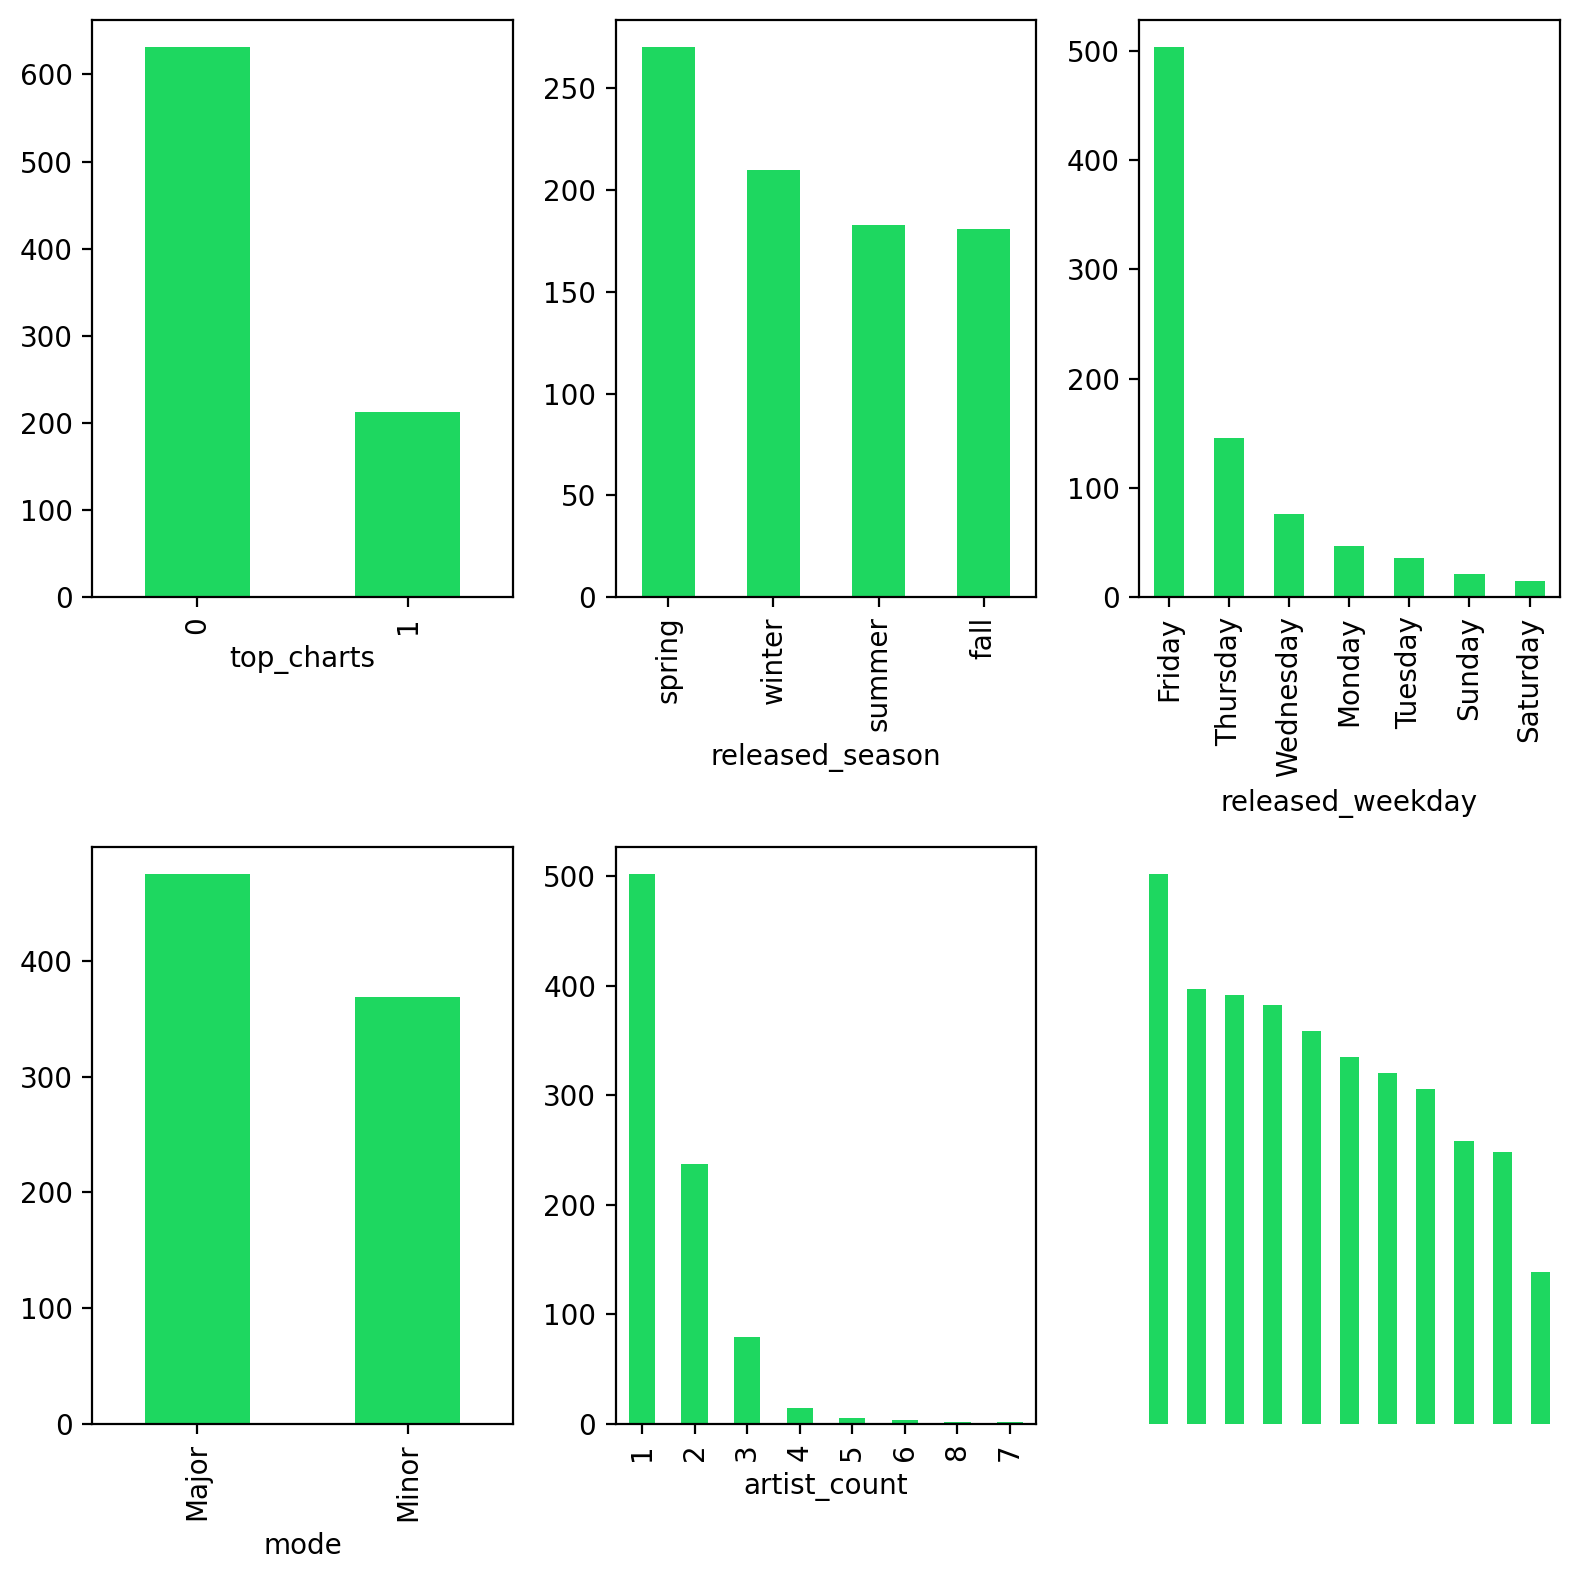

In [16]:
#Creating bar plots for categorical variables
nrows = 2
ncols = 3

fig, axs = plt.subplots(nrows, ncols, figsize=(8, 8))


for i, feature in enumerate(categorical_features):
    row, col = i // ncols, i % ncols
    
    df[feature].value_counts().plot(
        kind='bar', ax=axs[row, col],
        color=spotify_color
    )
    axs[row, col].set_xlabel(feature)
axs[-1, -1].axis('off')
fig.tight_layout()
plt.show();

The dataset consists of 6 categorical variables and we create a bar chart for each categorical feature, which shows the count of unique values in each category to understand their distribution. The distribution of released day of the week and artist count demonstrate high skeweness. As, we can observe from the bar charts above, Friday is the most popular day for releasing a song and solo releases are more common than collaboration between artists.

Additionally, to better understand the relationship between the categorical features and target variable, we calculate the proportion of top_charts values in each category.

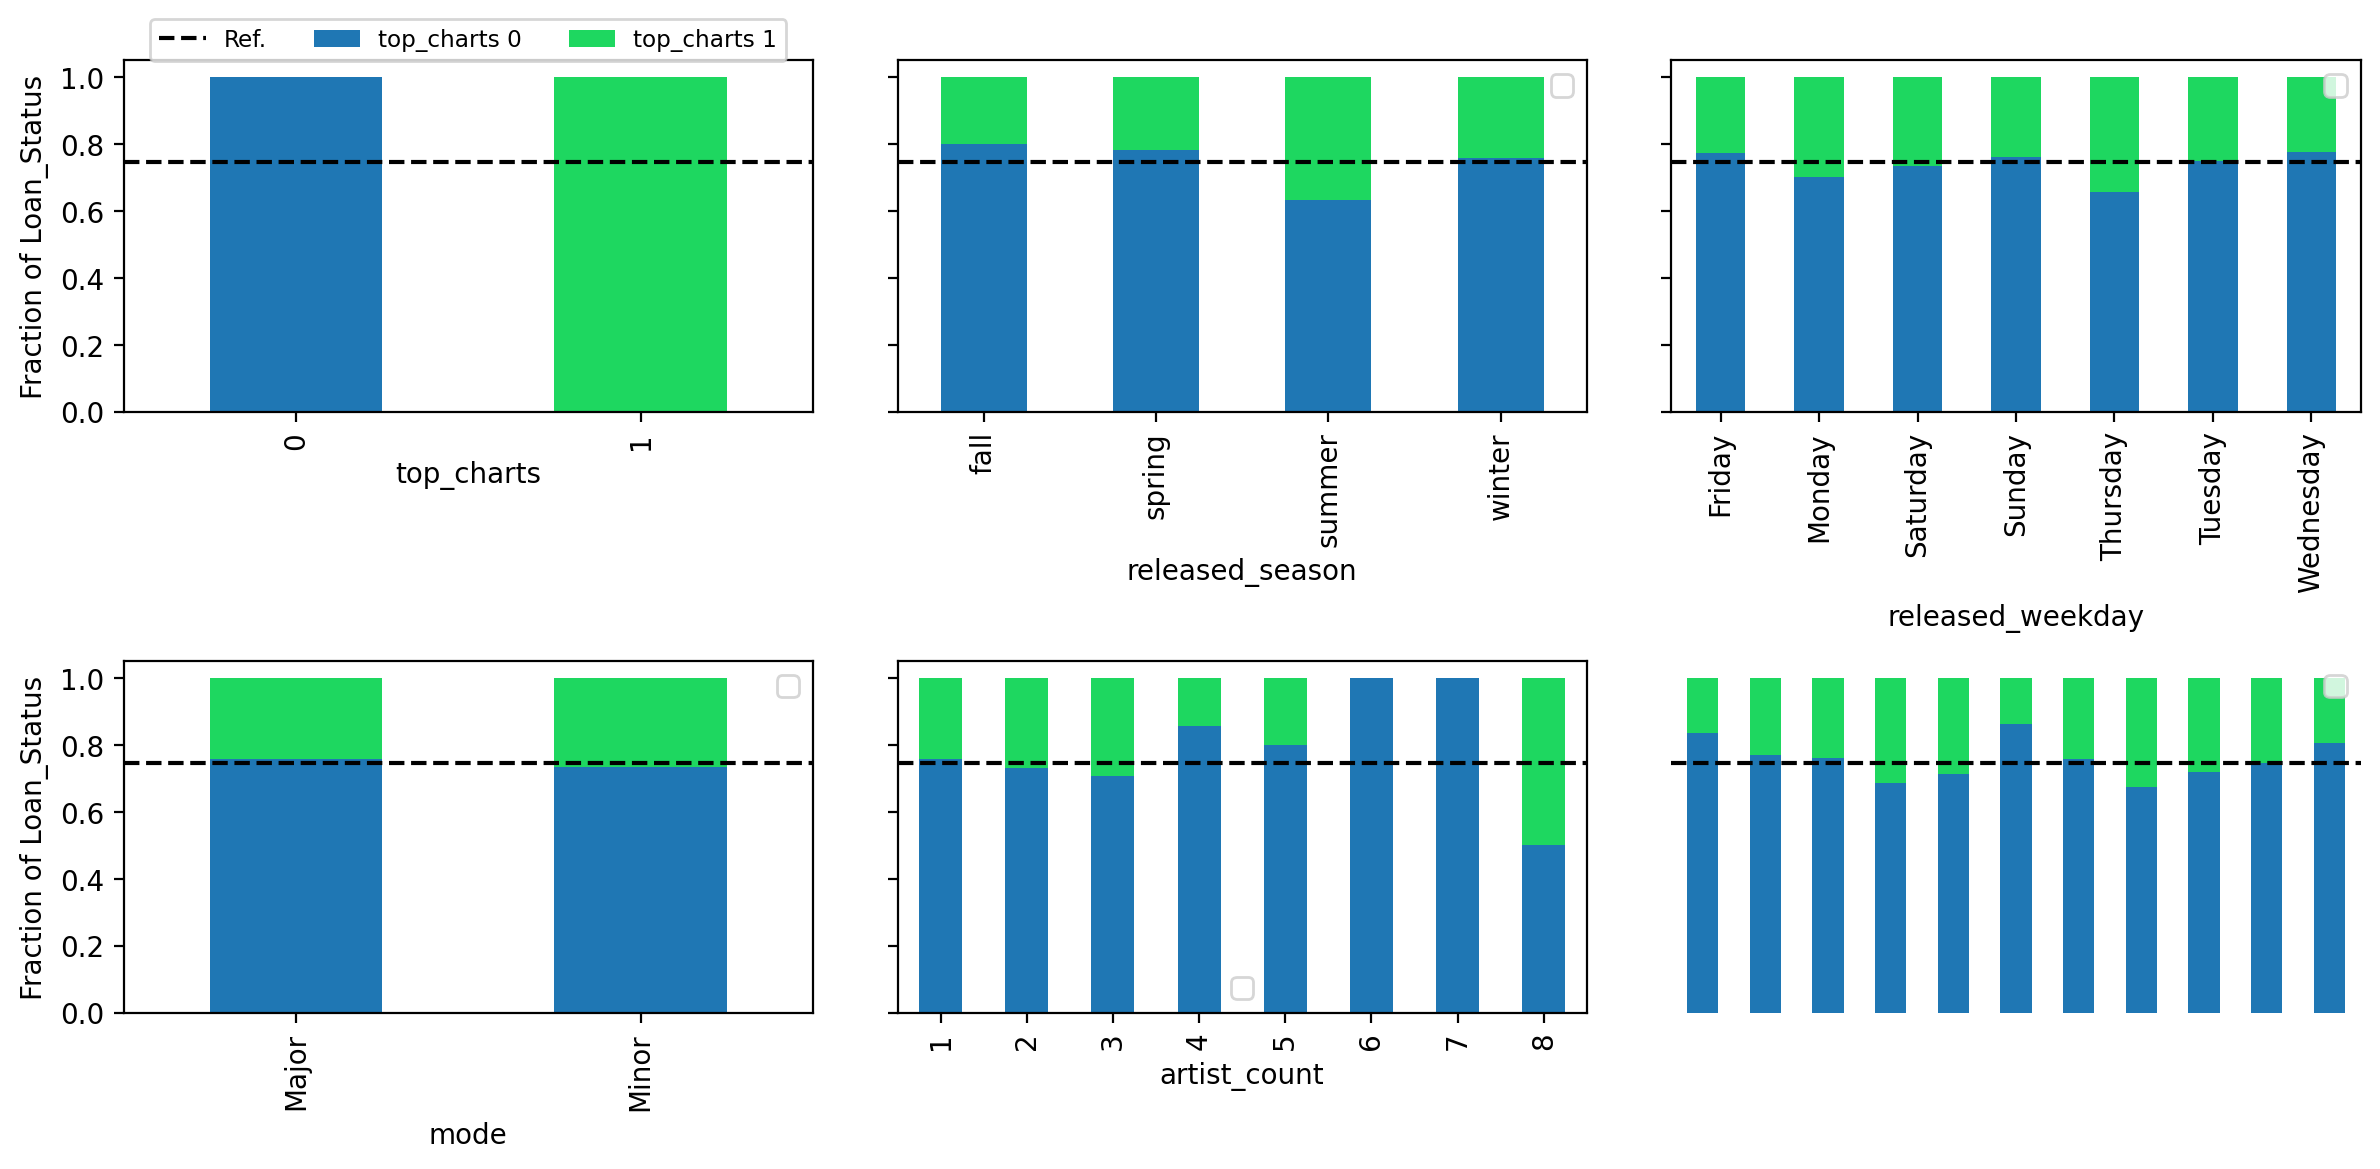

In [17]:
#Ploting box plots for each categorical variable with fraction of top_charts 0 in target variable

nrows = 2
ncols = 3

target_fraction = df['top_charts'].value_counts(normalize=True)


fig, axs = plt.subplots(nrows, ncols, figsize=(12, 6), sharey=True)


for i, feature in enumerate(categorical_features):
    row, col = i // ncols, i % ncols
    pd.crosstab(df[feature], df['top_charts']).div(
        df[feature].value_counts().astype(float), axis=0
    ).plot(
        kind='bar', stacked=True, ax=axs[row, col],
        color=['tab:blue', spotify_color]
    )
    axs[row, col].axhline(
        target_fraction[0],
        color='k', linestyle='--',
        label='__nolegend__'
    )
    axs[row, col].set_xlabel(feature)
    axs[row, col].legend('')
axs[0, 0].set_ylabel('Fraction of Loan_Status')
axs[1, 0].set_ylabel('Fraction of Loan_Status')
axs[-1, -1].axis('off')
axs[0, 0].legend(
    loc='upper center', bbox_to_anchor=(0.5, 1.15),
    ncols=3, fontsize='small',
    labels=['Ref.','top_charts 0', 'top_charts 1']
)
fig.tight_layout()
plt.show();

In [18]:
numerical_features = ['in_spotify_playlists', 'released_year','bpm','danceability_%','valence_%', 'energy_%', 'acousticness_%','instrumentalness_%','liveness_%','speechiness_%']
print("Numerical features:", numerical_features)

Numerical features: ['in_spotify_playlists', 'released_year', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']


To evaluate the distribution of numerical features, we plot histograms. By taking a look at the histograms below, we can observe that distribution of some variables is skewed. While distribution of liveness_%, speechiness_%, instrumentalness_%, acousticness_% and in_spotify_playlists is skewed positively, the distrbution of the variable 'released_year'is skewed negatively. 

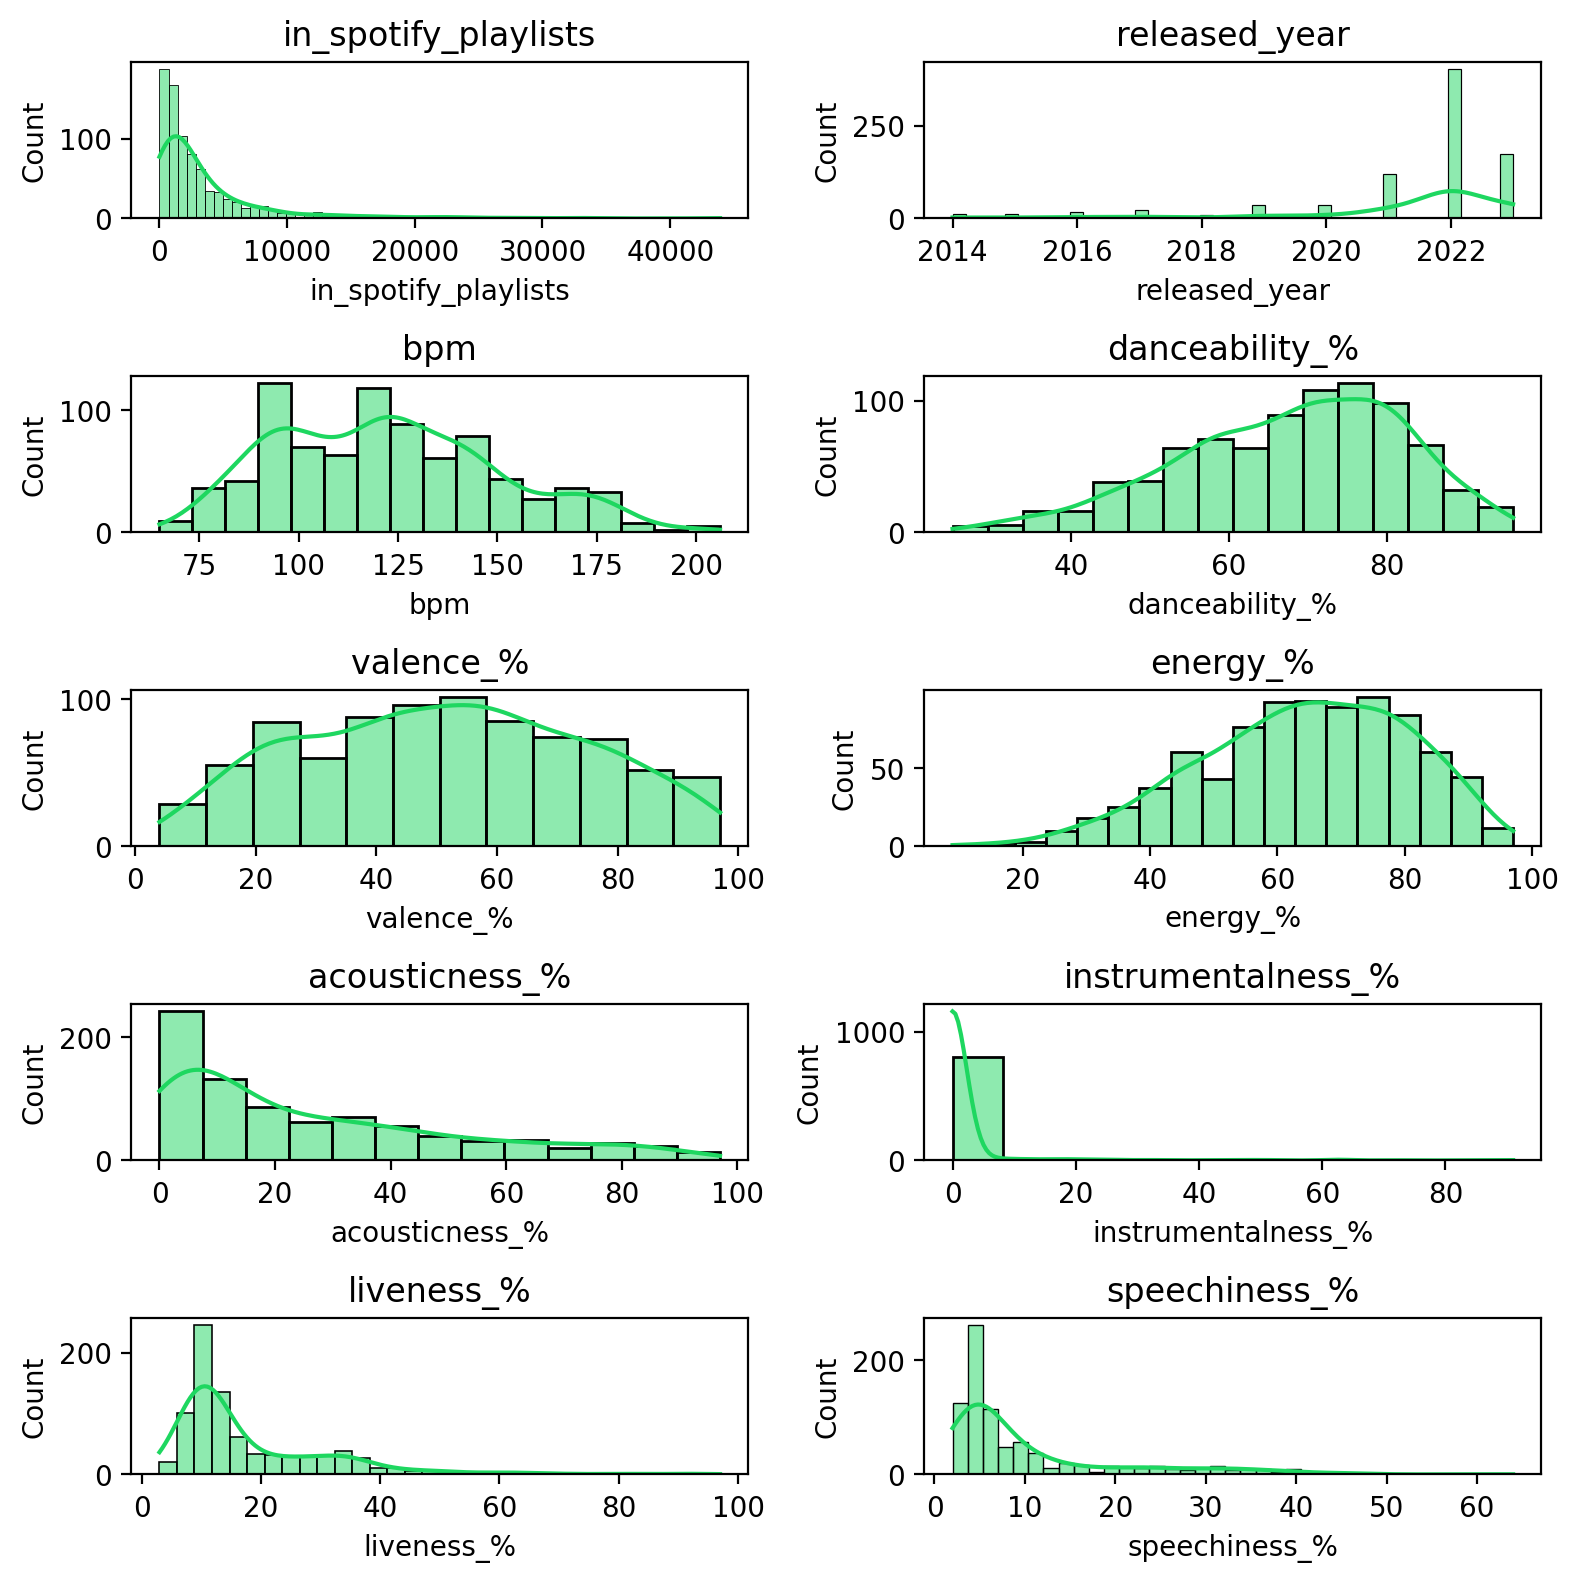

In [19]:
#Ploting histogram for numerical features
nrows, ncols = 5, 2
fig, axs = plt.subplots(nrows, ncols, figsize=(8, 8))

for i, feature in enumerate(numerical_features):
    row, col = i // ncols, i % ncols
    sns.histplot(df[feature], kde=True, ax=axs[row, col],color=spotify_color)
    axs[row, col].set_title(feature)
fig.tight_layout()
plt.show();

To evaluate outliers, we create the list of observations that are more than 3 standard deviations away from the mean. 4 variables containts substantial number of outliers. For further inspection of this variables, we create boxplots.

In [20]:
# Identifying the outliers that are more than 3 standard deviations away from the mean
features_with_outliers=[]

for feature in numerical_features:
    outliers = df[feature] > df[feature].mean() + 3 * df[feature].std()
    count_outliers = outliers.sum()
    if count_outliers > 5:
        features_with_outliers.append(feature)
    print(f"Outliers in {feature}:", outliers.sum())

Outliers in in_spotify_playlists: 22
Outliers in released_year: 0
Outliers in bpm: 0
Outliers in danceability_%: 0
Outliers in valence_%: 0
Outliers in energy_%: 0
Outliers in acousticness_%: 0
Outliers in instrumentalness_%: 16
Outliers in liveness_%: 19
Outliers in speechiness_%: 12


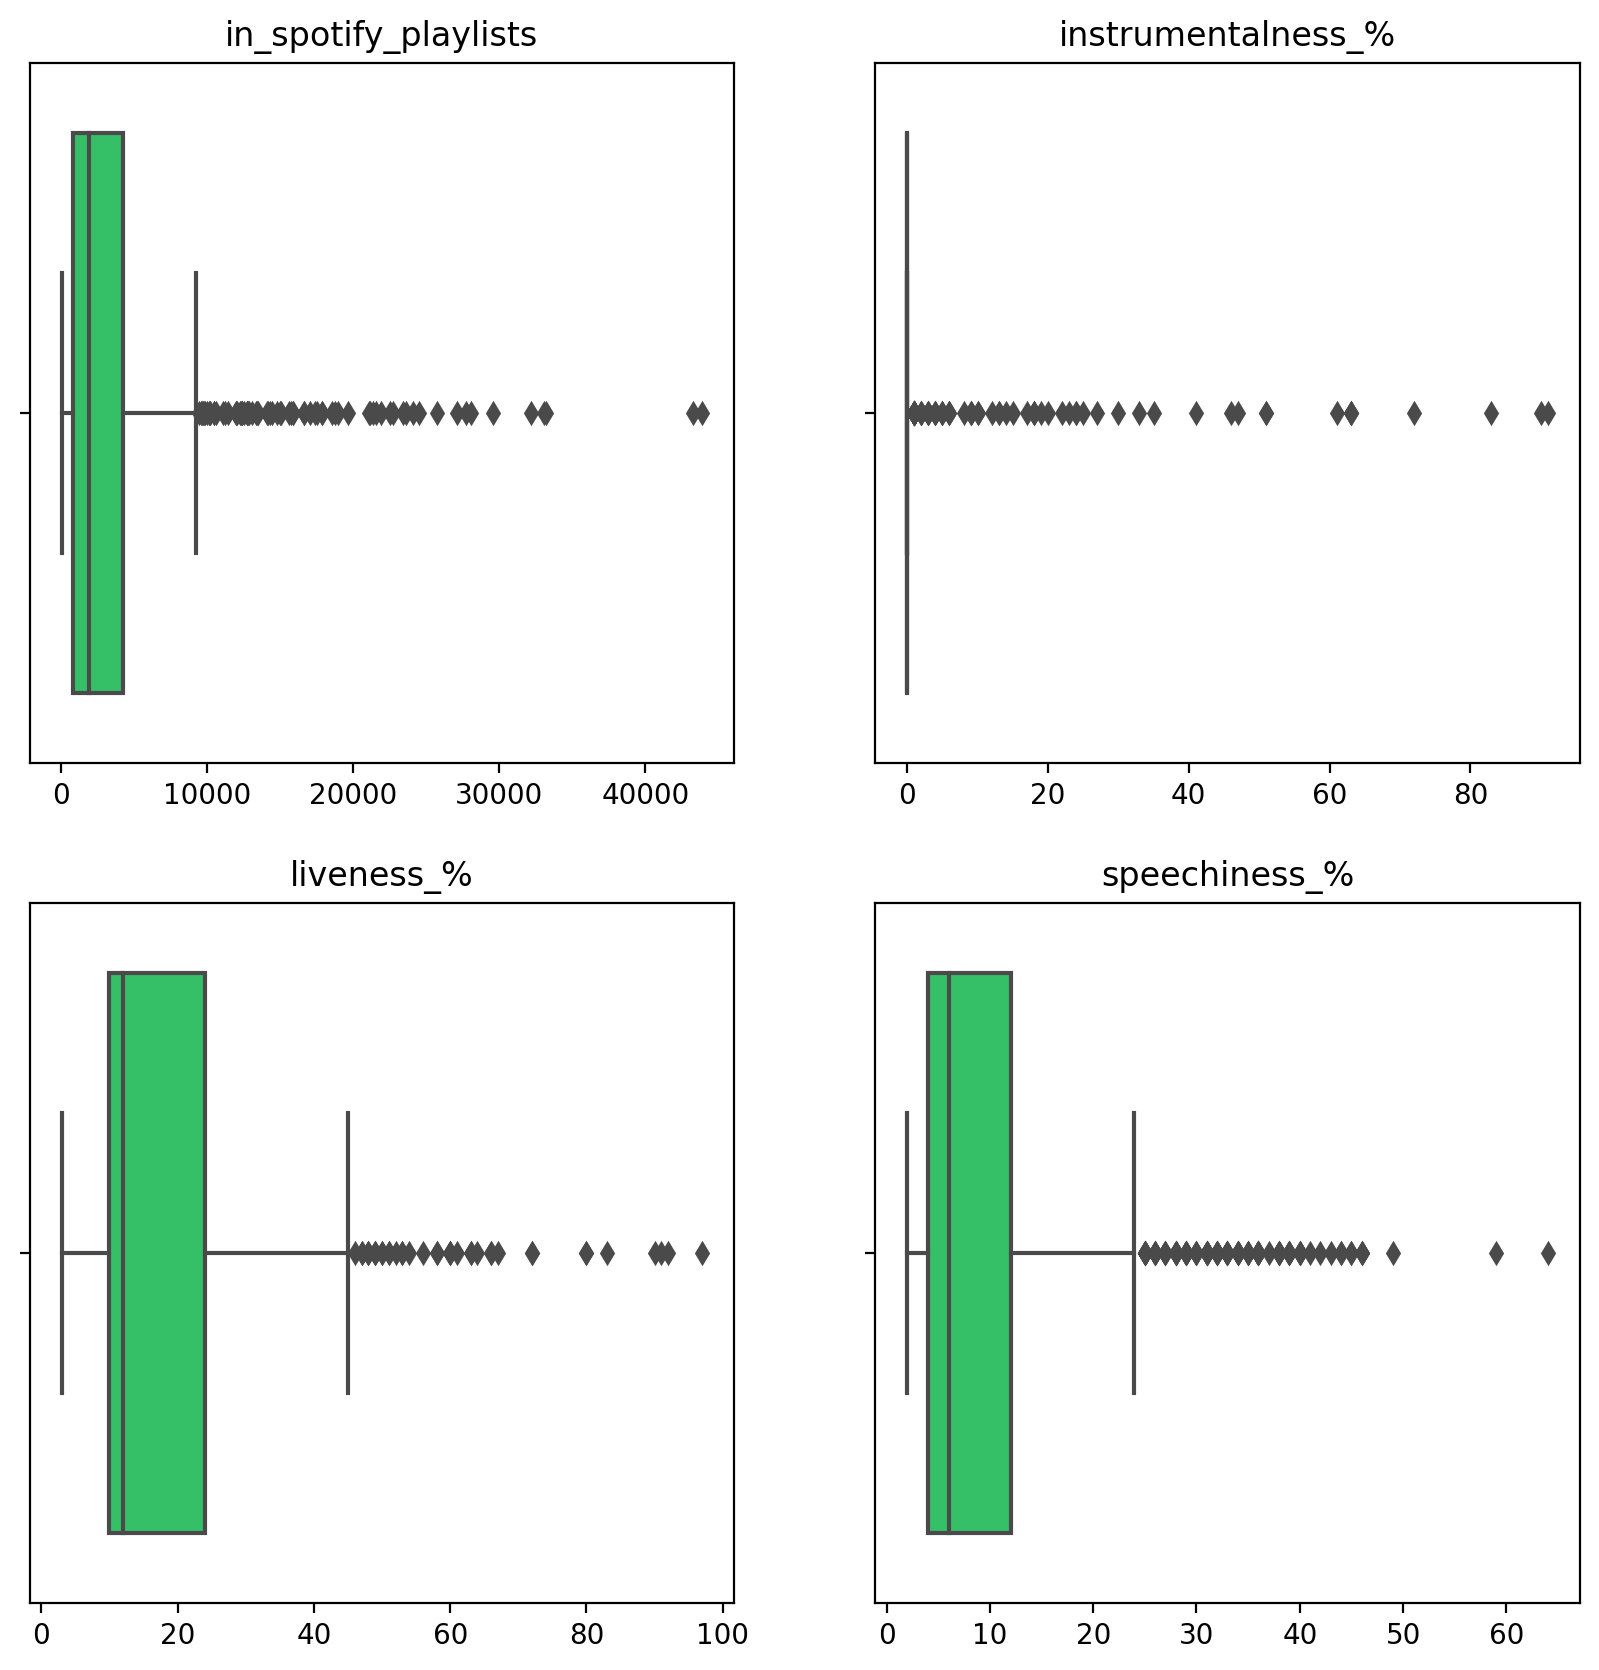

In [21]:
#Creating boxplots for further outlier expection
nrows = 2
ncols = 2

fig, axs = plt.subplots(nrows, ncols, figsize=(10, 10))

for i, variable in enumerate(features_with_outliers):
    row, col = i // ncols, i % ncols
    sns.boxplot(x=df[variable], ax=axs[row, col], color=spotify_color)
    axs[row, col].set_title(variable)
    axs[row, col].set_xlabel('')



Outliers in features like instrumentalness, liveness, and speechiness could represent niche trends or unique characteristics of songs that might be popular in certain genres. Such songs could become hits due to their distinctiveness. Therefore, we decided do not remove them from dataset. 
As variable in_spotify_playlists correlates with our target varible, we drop it in the next steps.

In [22]:
repeated_artists_with_counts = df['artist_name'].value_counts()
repeated_artists_with_counts = repeated_artists_with_counts[repeated_artists_with_counts > 1]

print(repeated_artists_with_counts)

artist_name
Taylor Swift                32
The Weeknd                  22
Bad Bunny                   19
SZA                         19
Harry Styles                17
                            ..
Rauw Alejandro               2
Troye Sivan                  2
Rauw Alejandro, Bizarrap     2
Junior H, Peso Pluma         2
d4vd                         2
Name: count, Length: 86, dtype: int64


In [23]:
#Creating dummies for categorical variables
df = pd.get_dummies(df, columns=['released_weekday','released_season','key','mode'])

In [24]:
#Dropping columns 
df= df.drop(columns=['streams', 'in_spotify_playlists', 'in_spotify_charts', 'released_year','mode_Minor', 'released_day', 'released_month', 'in_apple_playlists', 'in_apple_charts','in_deezer_charts','in_shazam_charts','in_deezer_playlists','track_name','artist_name'])

The dataset contains many features which represent success of song on different musical platforms, because the focus of our analysis on spotify, we remove these features from the dataset. We also remove the 'artist_name' variable from our analysis. This decision is based on the observation that modern artists frequently sample or cover older tracks, resulting in their names being associated with both original and derivative works. Including 'artist_name' could therefore potentially skew our results or provide a misleading interpretation of an artist's direct impact on a song's popularity.

In [25]:
#Checking for missing values
missing_values = df.isnull().sum()
print(missing_values)

artist_count                  0
bpm                           0
danceability_%                0
valence_%                     0
energy_%                      0
acousticness_%                0
instrumentalness_%            0
liveness_%                    0
speechiness_%                 0
top_charts                    0
released_weekday_Friday       0
released_weekday_Monday       0
released_weekday_Saturday     0
released_weekday_Sunday       0
released_weekday_Thursday     0
released_weekday_Tuesday      0
released_weekday_Wednesday    0
released_season_fall          0
released_season_spring        0
released_season_summer        0
released_season_winter        0
key_A                         0
key_A#                        0
key_B                         0
key_C#                        0
key_D                         0
key_D#                        0
key_E                         0
key_F                         0
key_F#                        0
key_G                         0
key_G#  

There are no missing values in the dataset.

In [26]:
df.dtypes

artist_count                  int64
bpm                           int64
danceability_%                int64
valence_%                     int64
energy_%                      int64
acousticness_%                int64
instrumentalness_%            int64
liveness_%                    int64
speechiness_%                 int64
top_charts                    int64
released_weekday_Friday        bool
released_weekday_Monday        bool
released_weekday_Saturday      bool
released_weekday_Sunday        bool
released_weekday_Thursday      bool
released_weekday_Tuesday       bool
released_weekday_Wednesday     bool
released_season_fall           bool
released_season_spring         bool
released_season_summer         bool
released_season_winter         bool
key_A                          bool
key_A#                         bool
key_B                          bool
key_C#                         bool
key_D                          bool
key_D#                         bool
key_E                       

In [27]:
df = df.astype('int64')

In [28]:
#Changing the ordee for target variable
columns = ['top_charts'] + [col for col in df.columns if col != 'top_charts']
df = df[columns]
df.shape

(844, 33)

In [29]:
y = df['top_charts'].values
X = df.iloc[:, 1:].values

In [30]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=123,
                                                    stratify=y)

print('All:', np.bincount(y) / float(len(y)) * 100.0)
print('Training:', np.bincount(train_y) / float(len(train_y)) * 100.0)
print('Test:', np.bincount(test_y) / float(len(test_y)) * 100.0)

All: [74.76303318 25.23696682]
Training: [74.81481481 25.18518519]
Test: [74.55621302 25.44378698]


Spliting the dataset, 80% of values for training and 20% for testing. Implementing stratification for equal representation of the values in both sets, because there is a significant imbalance between the number of songs that did not make it into the top charts (0) versus those that did (1).

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

Even though our variables already range from 0 to 1, we have decided to implement a standard scaler in preparation for our analysis using distance-based models such as KNN, making sure that each feature contributes equally to the distance calculation.

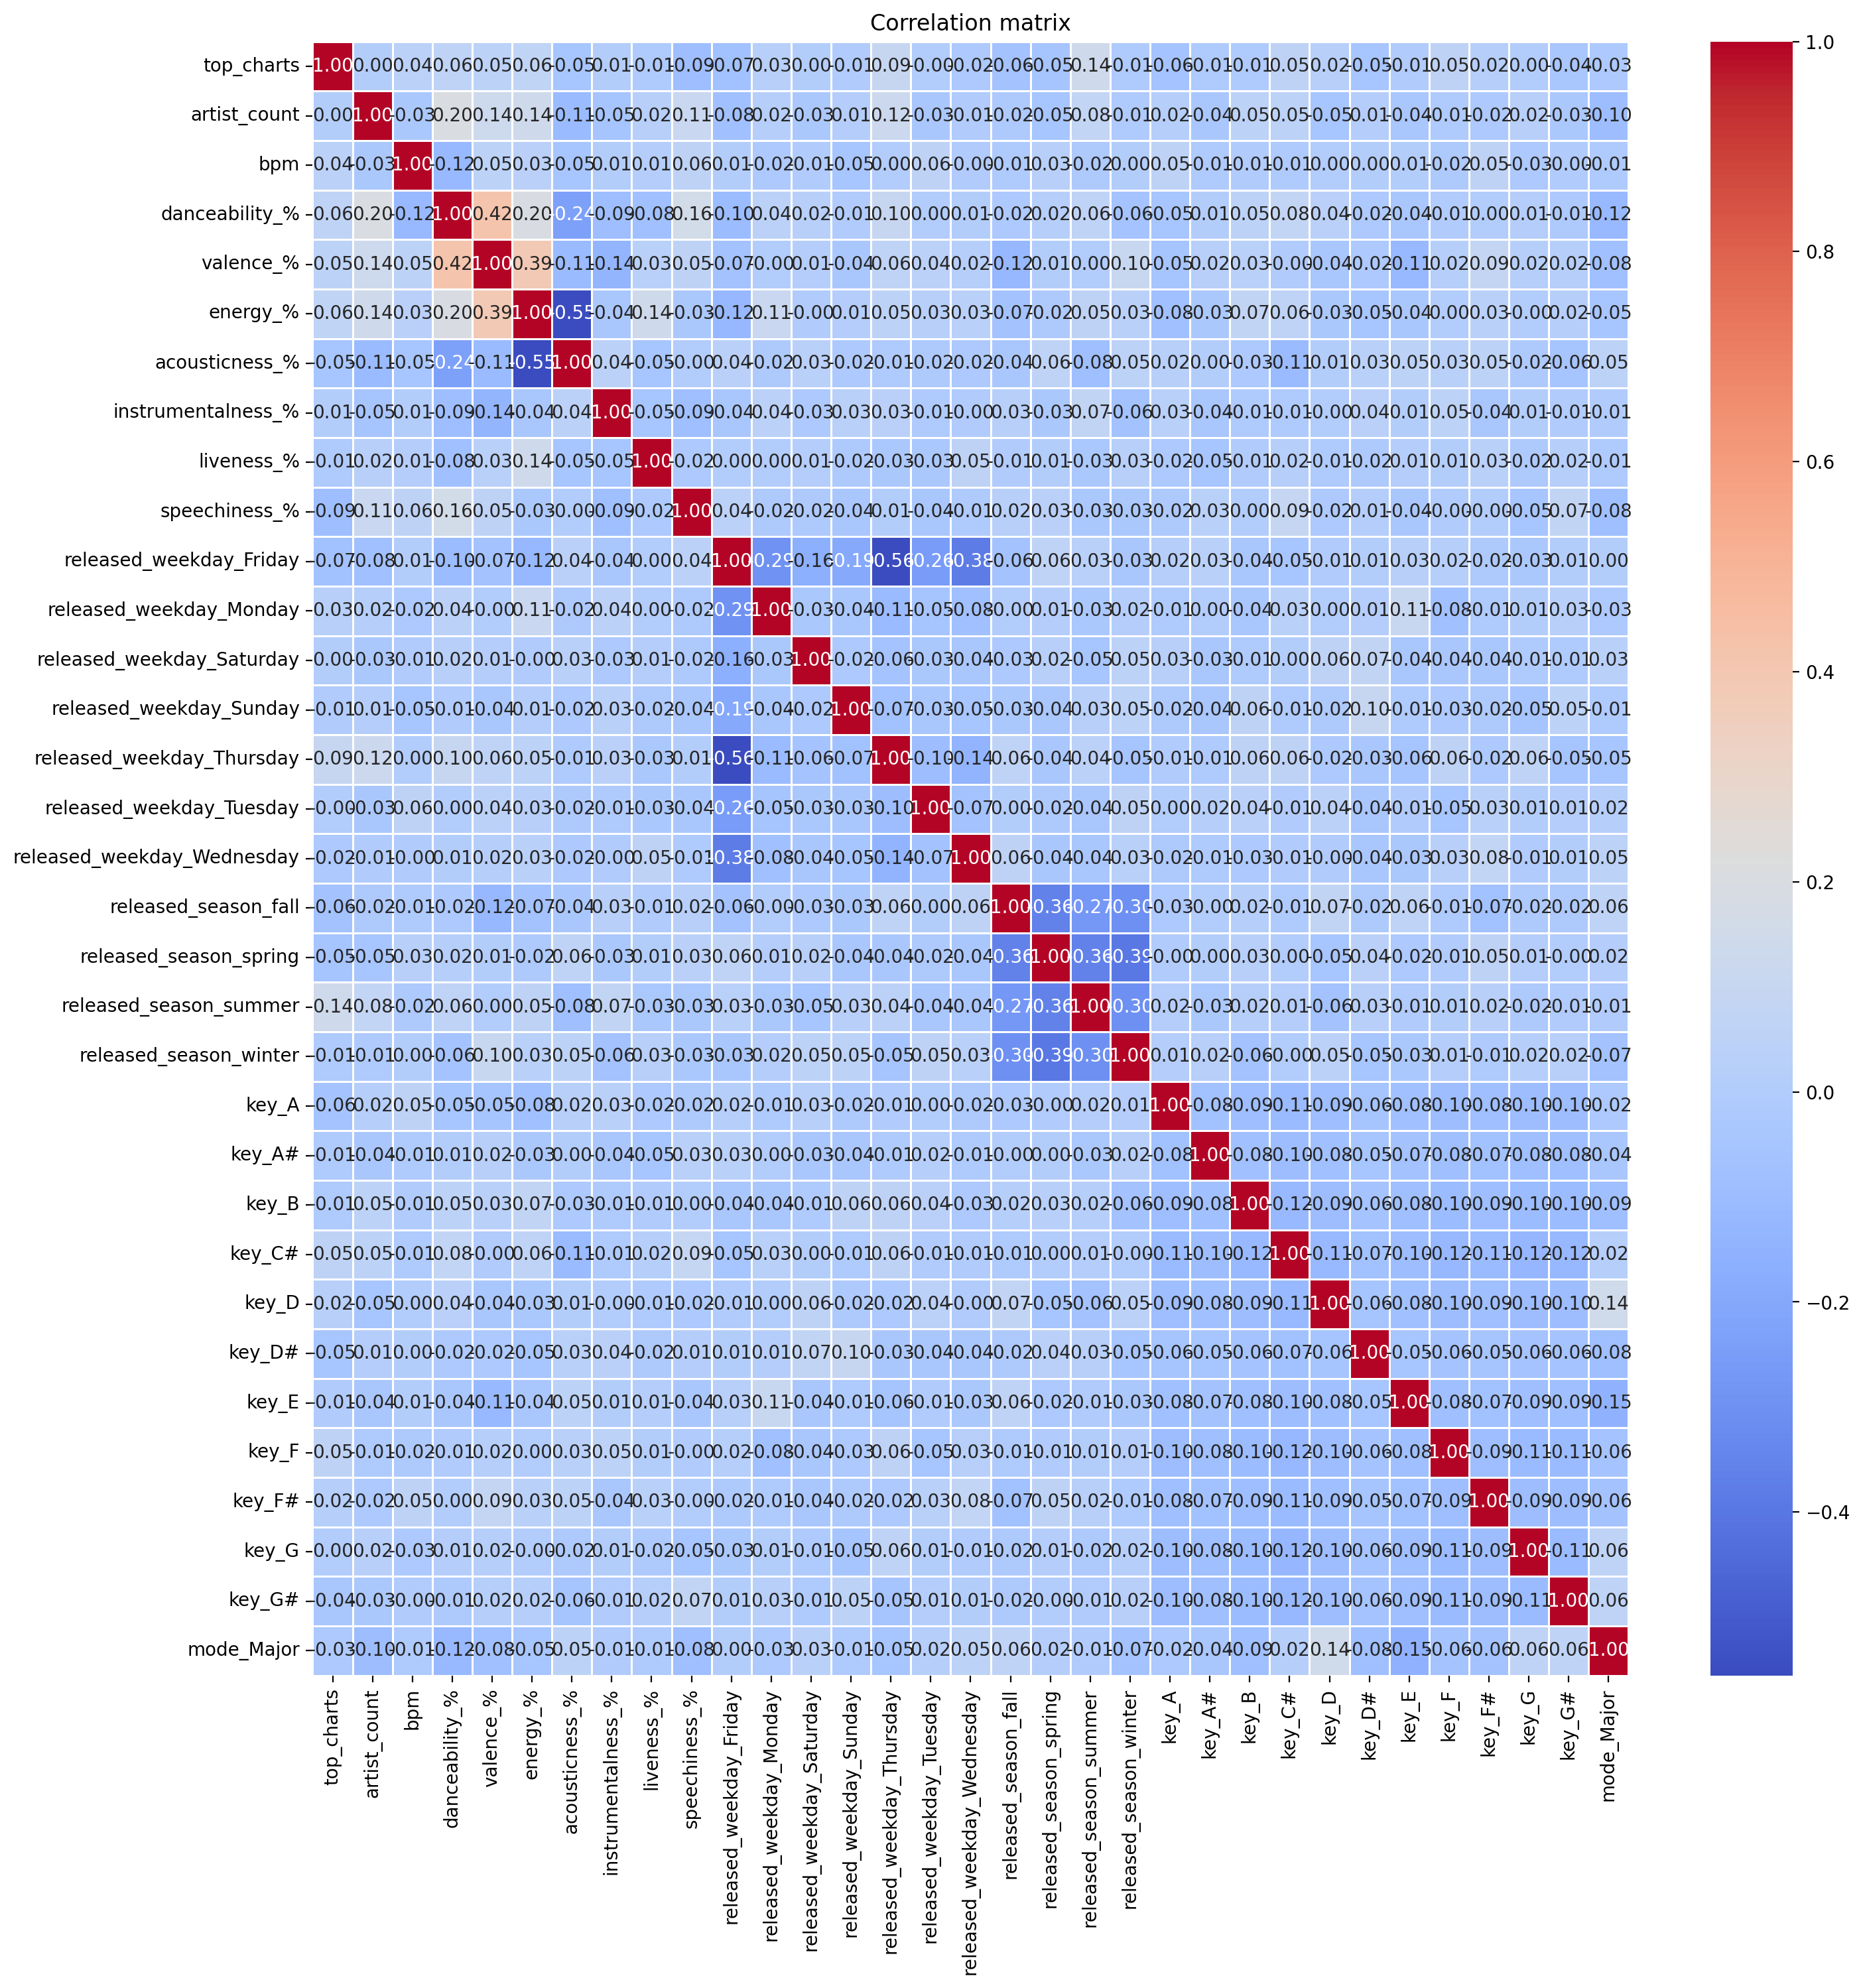

In [32]:
#Plotting the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(16, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation matrix')
plt.show()

By taking a look at the correlation matrix, we can observe that our taget variable does not have a significant correlation with other variables.

Despite correlation between musical features, it's crucial to consider all of them for a thorough understanding of what drives a song's popularity. For example, 'danceability' and 'bpm' may be correlated, yet each contributes uniquely to a song’s allure. Keeping all these features helps build a clearer and more detailed picture of why a song might be successful. In our ananlysis we imploy such models as Decion Tree, Random Forrest, Ridge, Lasso for which multicollineariry is not an issue.

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Decision Tree

In [35]:
tree = DecisionTreeClassifier()
tree.fit(train_X, train_y)

DecisionTreeClassifier()

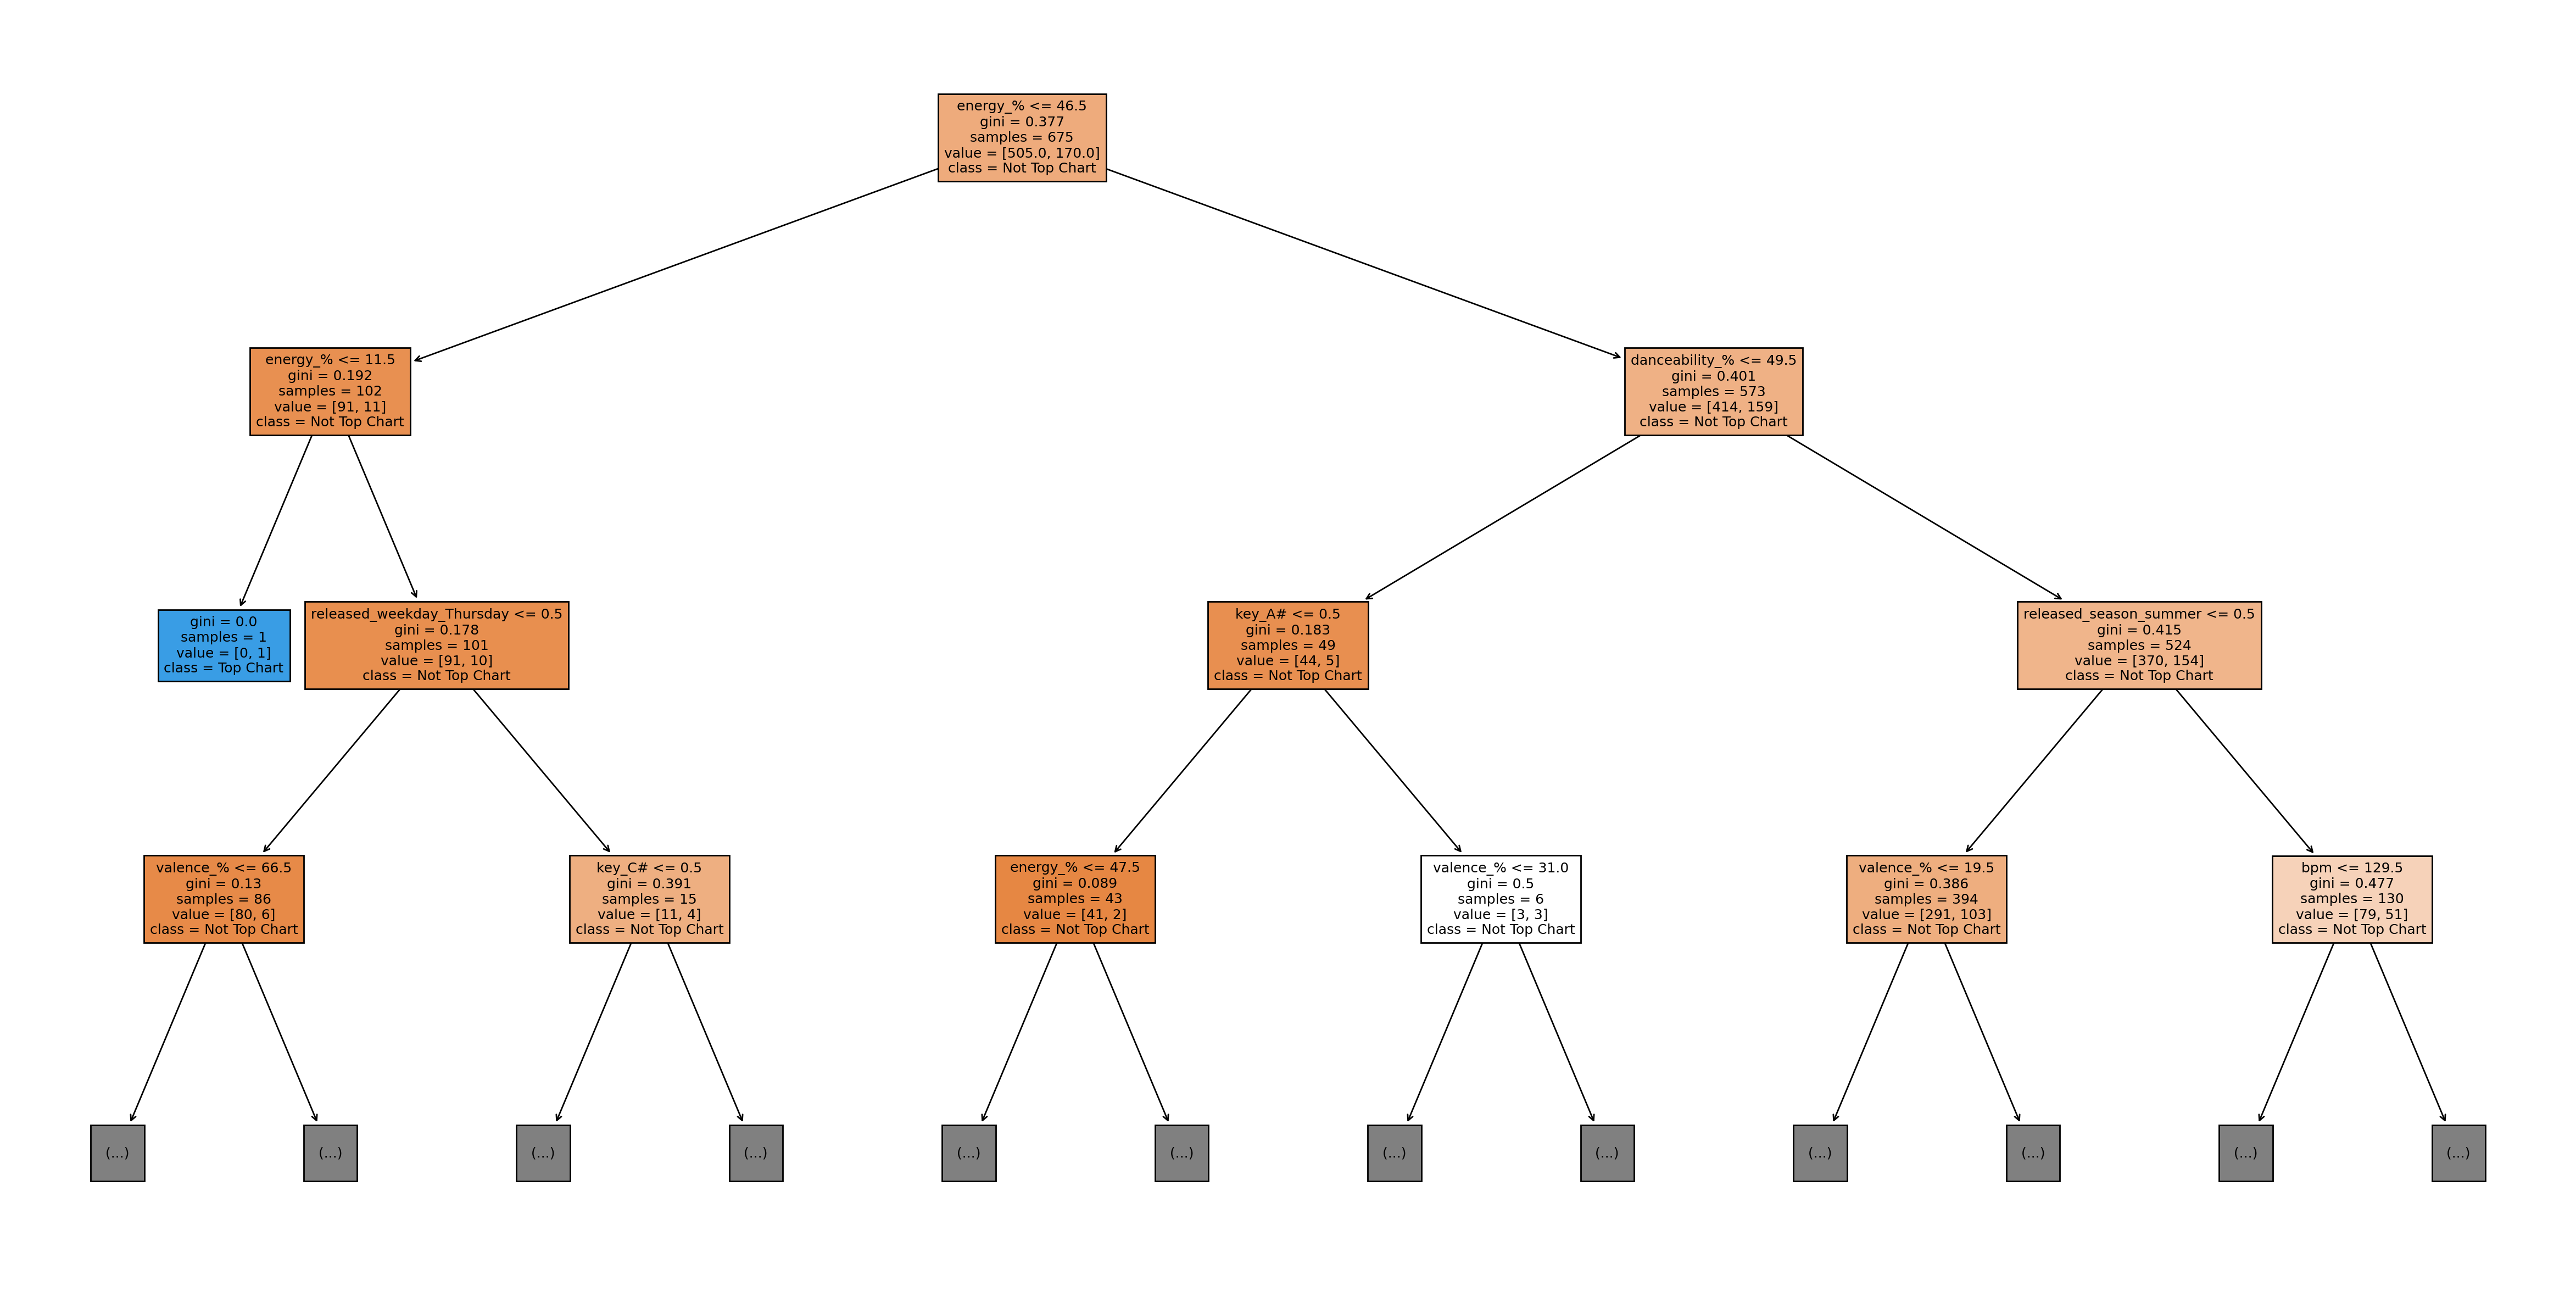

In [36]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Convert Index object to list
feature_names = list(df.columns[1:])

# Fit the decision tree model
tree.fit(train_X, train_y)

# Plot the decision tree with larger box sizes
plt.figure(figsize=(30,15))
plot_tree(tree, filled=True, feature_names=feature_names, class_names=['Not Top Chart', 'Top Chart'], max_depth=3, fontsize=9)
plt.show()


In [37]:
print("Accuracy = %.3f" % (tree.score(X, y)))

Accuracy = 0.925


In [38]:
pred_y = tree.predict(test_X)

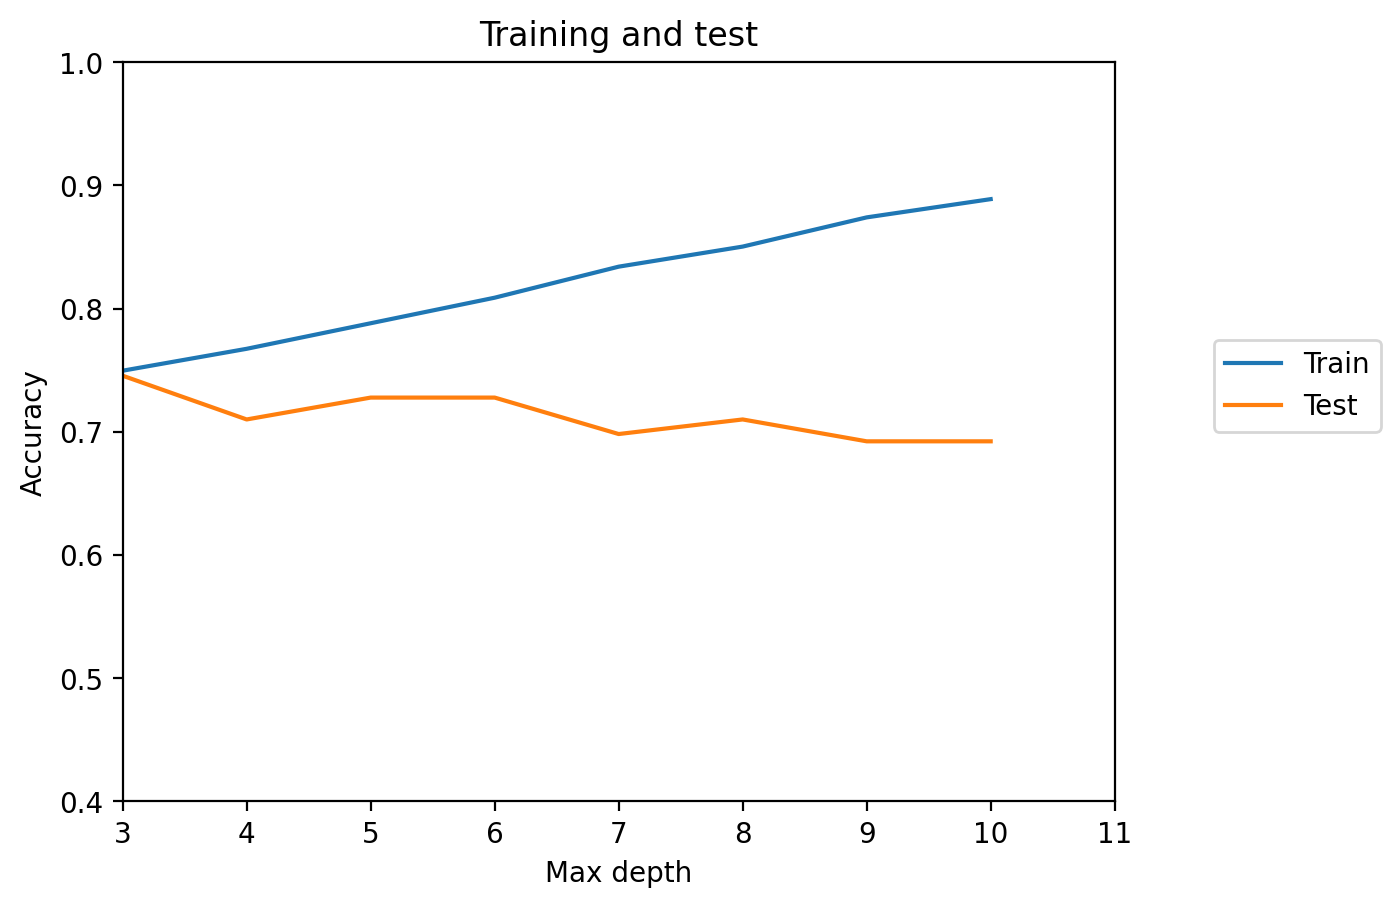

In [39]:
training_acc = []
test_acc = []
depths = range(1, 11)
for current_depth in depths:
    model = DecisionTreeClassifier(max_depth=current_depth)
    model.fit(train_X, train_y)    
    training_acc.append(model.score(train_X, train_y))
    test_acc.append(model.score(test_X, test_y))

plt.plot(depths, training_acc, label="Train")
plt.plot(depths, test_acc, label="Test")
plt.title("Training and test")
plt.xlabel("Max depth")
plt.ylabel("Accuracy")
plt.ylim([0.4, 1])
plt.xlim([3,11])
plt.legend(loc=(1.1, 0.5))
plt.show()

From the plot above, we can observe that the model might overfit the training data as the depth increases. 

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [41]:
print("accuracy on the test set", tree.score(test_X, test_y))
print("accuracy on the training set", tree.score(train_X, train_y))

accuracy on the test set 0.6272189349112426
accuracy on the training set 1.0


The model predicts perfectly on training set with accuracy of 100%. However, for unseen data, the accuracy only 62%.

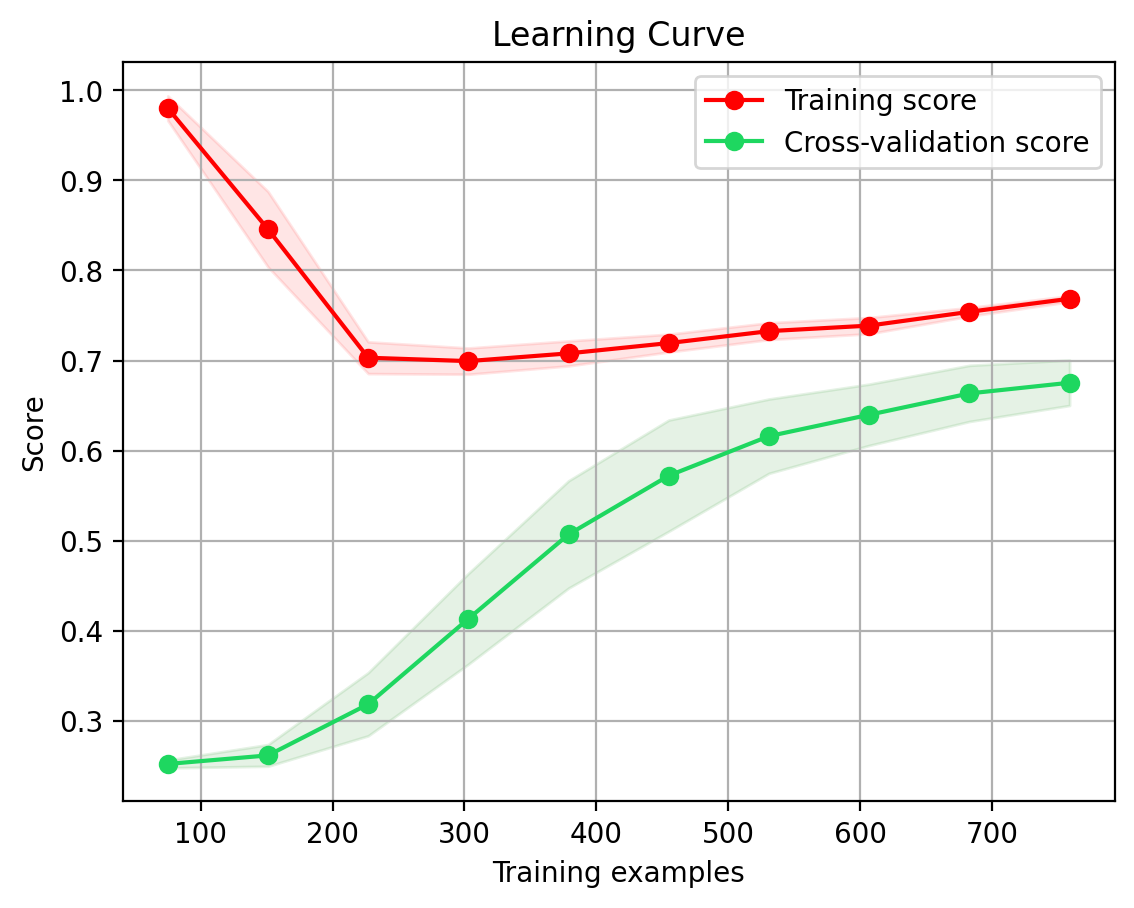

In [42]:
from sklearn.model_selection import learning_curve

plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
train_sizes, train_scores, test_scores = learning_curve(
    KNeighborsClassifier(), X, y, cv=10, train_sizes=np.linspace(.1, 1, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color=spotify_color,
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

Initially, the learning curve shows a high variance with a large gap between training and cross-validation scores. With more data, the model begins to generalize better, as seen by converging scores where the training score decreases and the cross-validation score increases. Both scores continue to raise, indicating that model performances can enhance further with additional data.

In [43]:
#GridSearch for Decision Tree

from sklearn.model_selection import GridSearchCV

param_grid_dt = {
    'max_depth': range(1, 30, 2),
    'min_impurity_decrease': np.arange(0.05, 0.4, 0.05),
    'criterion': ['gini', 'entropy'],
}

grid_search_dt = GridSearchCV(
    DecisionTreeClassifier(), 
    param_grid_dt, 
    cv=10, 
    verbose=1,
    return_train_score=True
)


grid_search_dt.fit(train_X, train_y)

print("Test set score Decission Tree: {:.4f}".format(grid_search_dt.score(test_X, test_y)))
print("Best parameters: {}".format(grid_search_dt.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_dt.best_score_))
print("Best estimator:\n{}".format(grid_search_dt.best_estimator_))
print('Accuracy on the testing set: {:.4f}'.format(grid_search_dt.best_estimator_.score(test_X, test_y)))

Fitting 10 folds for each of 210 candidates, totalling 2100 fits
Test set score Decission Tree: 0.7456
Best parameters: {'criterion': 'gini', 'max_depth': 1, 'min_impurity_decrease': 0.05}
Best cross-validation score: 0.75
Best estimator:
DecisionTreeClassifier(max_depth=1, min_impurity_decrease=0.05)
Accuracy on the testing set: 0.7456


By tuning the model with hyperparameters as max_depth, min_impurity_decrease and criterion, the perfomance of the model increased by 12%.

# KNN

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_X, train_y)

KNeighborsClassifier()

In [46]:
print("accuracy on the test set KNN", knn.score(test_X, test_y))
print("accuracy on the training set KNN", knn.score(train_X, train_y))

accuracy on the test set KNN 0.6627218934911243
accuracy on the training set KNN 0.7703703703703704


In [47]:
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')

print("scores: ", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores:  [0.65680473 0.68639053 0.64497041 0.65680473 0.67261905]
Accuracy: 0.66 (+/- 0.03)


In [48]:
n_neighbors_values = np.arange(1, 60)
accuracy = []

for n_neighbors in n_neighbors_values:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(train_X, train_y)
    accuracy1 = knn.score(test_X, test_y)
    accuracy.append(accuracy1)
    print(f"For {n_neighbors} neighbor(s) accuracy is {accuracy1}")

For 1 neighbor(s) accuracy is 0.5976331360946746
For 2 neighbor(s) accuracy is 0.6804733727810651
For 3 neighbor(s) accuracy is 0.6331360946745562
For 4 neighbor(s) accuracy is 0.7100591715976331
For 5 neighbor(s) accuracy is 0.6627218934911243
For 6 neighbor(s) accuracy is 0.7396449704142012
For 7 neighbor(s) accuracy is 0.727810650887574
For 8 neighbor(s) accuracy is 0.7396449704142012
For 9 neighbor(s) accuracy is 0.7337278106508875
For 10 neighbor(s) accuracy is 0.727810650887574
For 11 neighbor(s) accuracy is 0.7218934911242604
For 12 neighbor(s) accuracy is 0.7337278106508875
For 13 neighbor(s) accuracy is 0.7218934911242604
For 14 neighbor(s) accuracy is 0.727810650887574
For 15 neighbor(s) accuracy is 0.727810650887574
For 16 neighbor(s) accuracy is 0.7337278106508875
For 17 neighbor(s) accuracy is 0.727810650887574
For 18 neighbor(s) accuracy is 0.7337278106508875
For 19 neighbor(s) accuracy is 0.7337278106508875
For 20 neighbor(s) accuracy is 0.7396449704142012
For 21 neighbo

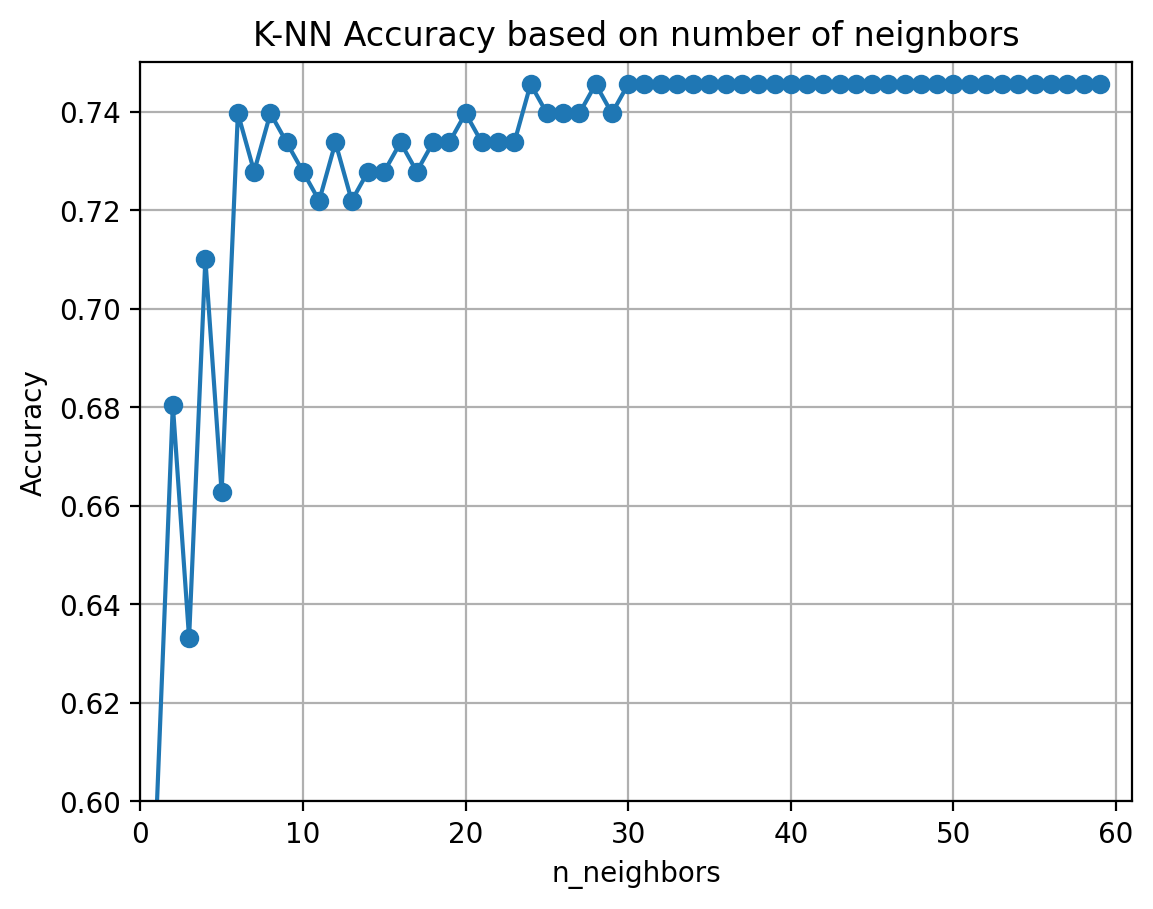

In [49]:
plt.plot(n_neighbors_values, accuracy, marker='o')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.title('K-NN Accuracy based on number of neignbors')
plt.ylim([0.6, 0.75])
plt.xlim([0,61])
plt.grid(True)

In [52]:
#GridSearch for k-NN

param_grid_knn = {
    'n_neighbors':range(1,50,1),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(
    KNeighborsClassifier(), 
    param_grid_knn, 
    cv=10, 
    verbose=1,
    return_train_score=True
)

grid_search_knn.fit(train_X, train_y)

print("Test set score k-NN: {:.4f}".format(grid_search_knn.score(test_X, test_y)))
print("Best parameters: {}".format(grid_search_knn.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_knn.best_score_))
print("Best estimator:\n{}".format(grid_search_knn.best_estimator_))
print('Accuracy on the testing set: {:.4f}'.format(grid_search_knn.best_estimator_.score(test_X, test_y)))

Fitting 10 folds for each of 196 candidates, totalling 1960 fits
Test set score k-NN: 0.7278
Best parameters: {'metric': 'manhattan', 'n_neighbors': 23, 'weights': 'distance'}
Best cross-validation score: 0.75
Best estimator:
KNeighborsClassifier(metric='manhattan', n_neighbors=23, weights='distance')
Accuracy on the testing set: 0.7278


Gridsearch with hyperparameters for KNN helped to improve the perfomance of the model by 6% compared to the model without tunning.

# Naive Bayes Classifier

In [53]:
from sklearn.naive_bayes import GaussianNB

In [54]:
nbc = GaussianNB()
y_pred = nbc.fit(train_X, train_y).predict(test_X)

In [55]:
mislabel = np.sum((test_y!= pred_y))
print("Total number of mislabelled data points from {} test samples is {}".format(len(test_y),mislabel))

Total number of mislabelled data points from 169 test samples is 63


In [56]:
print("accuracy on the test set NBC", nbc.score(test_X, test_y))
print("accuracy on the training set NBC", nbc.score(train_X, train_y))

accuracy on the test set NBC 0.5029585798816568
accuracy on the training set NBC 0.6251851851851852


In [57]:
scores_nbc = cross_val_score(nbc, X, y, cv=5, scoring='accuracy')

print("scores: ", scores_nbc)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_nbc.mean(), scores_nbc.std() * 2))

scores:  [0.62721893 0.55029586 0.5739645  0.6035503  0.55952381]
Accuracy: 0.58 (+/- 0.06)


In [58]:
#GrisSerach for Naive Bayes Classifier

param_grid_nbc = { 'var_smoothing':np.logspace(0,-9, num=100)}

grid_search_nbc = GridSearchCV(
    GaussianNB(), 
    param_grid_nbc, 
    cv=10, 
    verbose=1,
    return_train_score=True
)

grid_search_nbc.fit(train_X, train_y)

print("Test set score NB: {:.4f}".format(grid_search_nbc.score(test_X, test_y)))
print("Best parameters: {}".format(grid_search_nbc.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_nbc.best_score_))
print("Best estimator:\n{}".format(grid_search_nbc.best_estimator_))
print('Accuracy on the testing set: {:.4f}'.format(grid_search_nbc.best_estimator_.score(test_X, test_y)))

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Test set score NB: 0.7456
Best parameters: {'var_smoothing': 1.0}
Best cross-validation score: 0.75
Best estimator:
GaussianNB(var_smoothing=1.0)
Accuracy on the testing set: 0.7456


The Naive Bayes Classifier with impementation of grid search improves the berfomance by 24%

In [61]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, random_state=123)
random_forest.fit(train_X, train_y)

RandomForestClassifier(random_state=123)

In [62]:
print("Random Forest Classifier:")
print("Accuracy on the test set:", random_forest.score(test_X, test_y))
print("Accuracy on the training set:", random_forest.score(train_X, train_y))

Random Forest Classifier:
Accuracy on the test set: 0.7455621301775148
Accuracy on the training set: 1.0


In [63]:
feature_importance = random_forest.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]

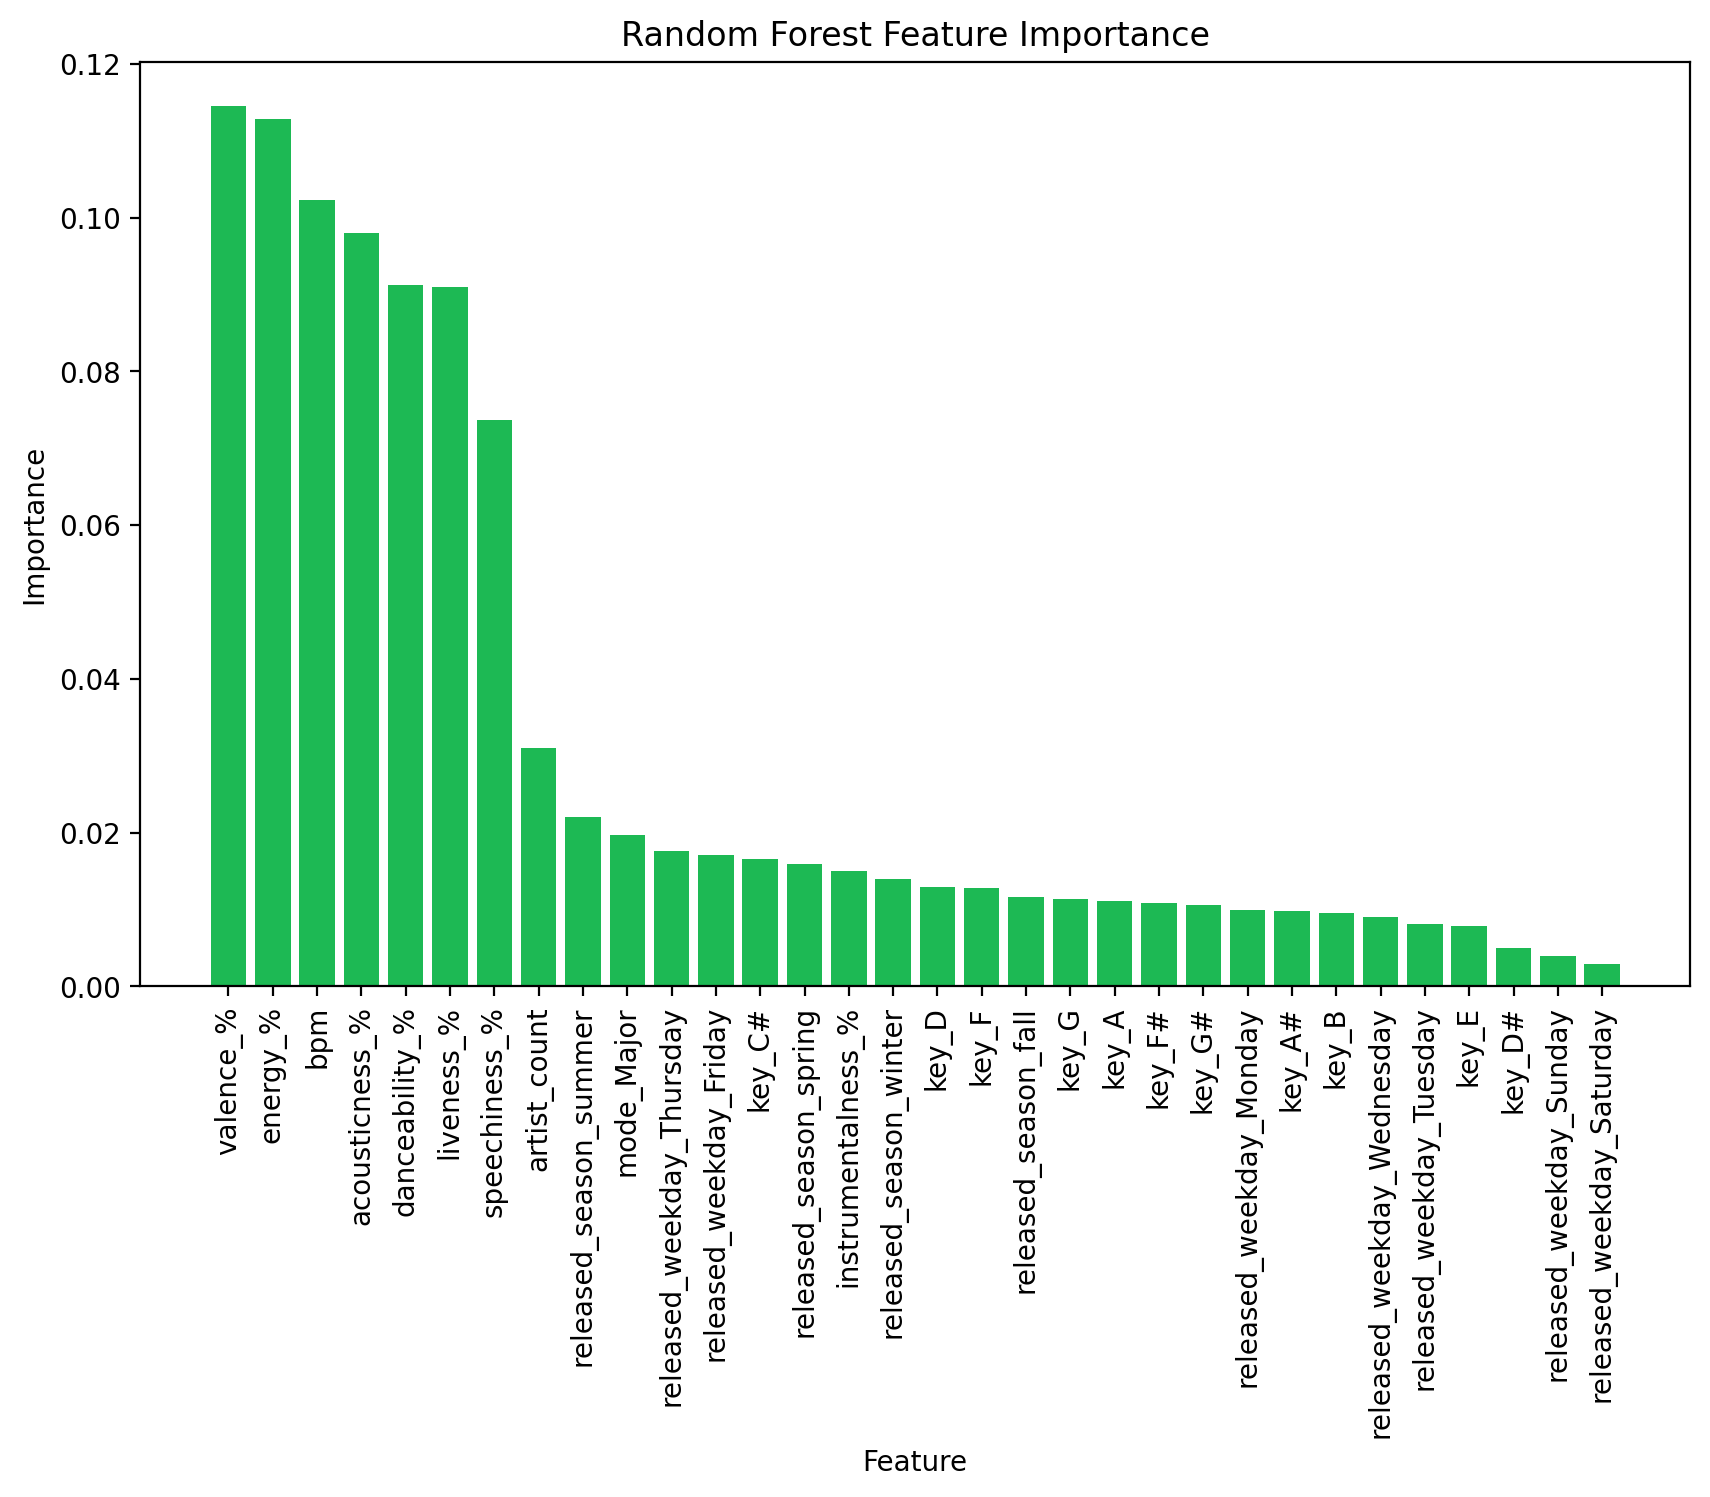

In [64]:
plt.figure(figsize=(10, 6))
plt.bar(range(train_X.shape[1]), feature_importance[sorted_idx], align="center", color='#1DB954')
plt.xticks(range(train_X.shape[1]), df.drop(columns=['top_charts']).columns[sorted_idx], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Random Forest Feature Importance")
plt.show()

The features related to the mood and rhythm of the music ( 'valence %', 'energy %', 'bpm', 'acousticness') are the most important for the music. The song will also be succesfull if it is released in summer on Thursday or Friday

In [65]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=123)
gradient_boosting.fit(train_X, train_y)

GradientBoostingClassifier(random_state=123)

In [66]:
print("Gradient Boosting Classifier:")
print("Accuracy on the test set:", gradient_boosting.score(test_X, test_y))
print("Accuracy on the training set:", gradient_boosting.score(train_X, train_y))

Gradient Boosting Classifier:
Accuracy on the test set: 0.727810650887574
Accuracy on the training set: 0.8607407407407407


In [67]:
feature_importance = gradient_boosting.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]

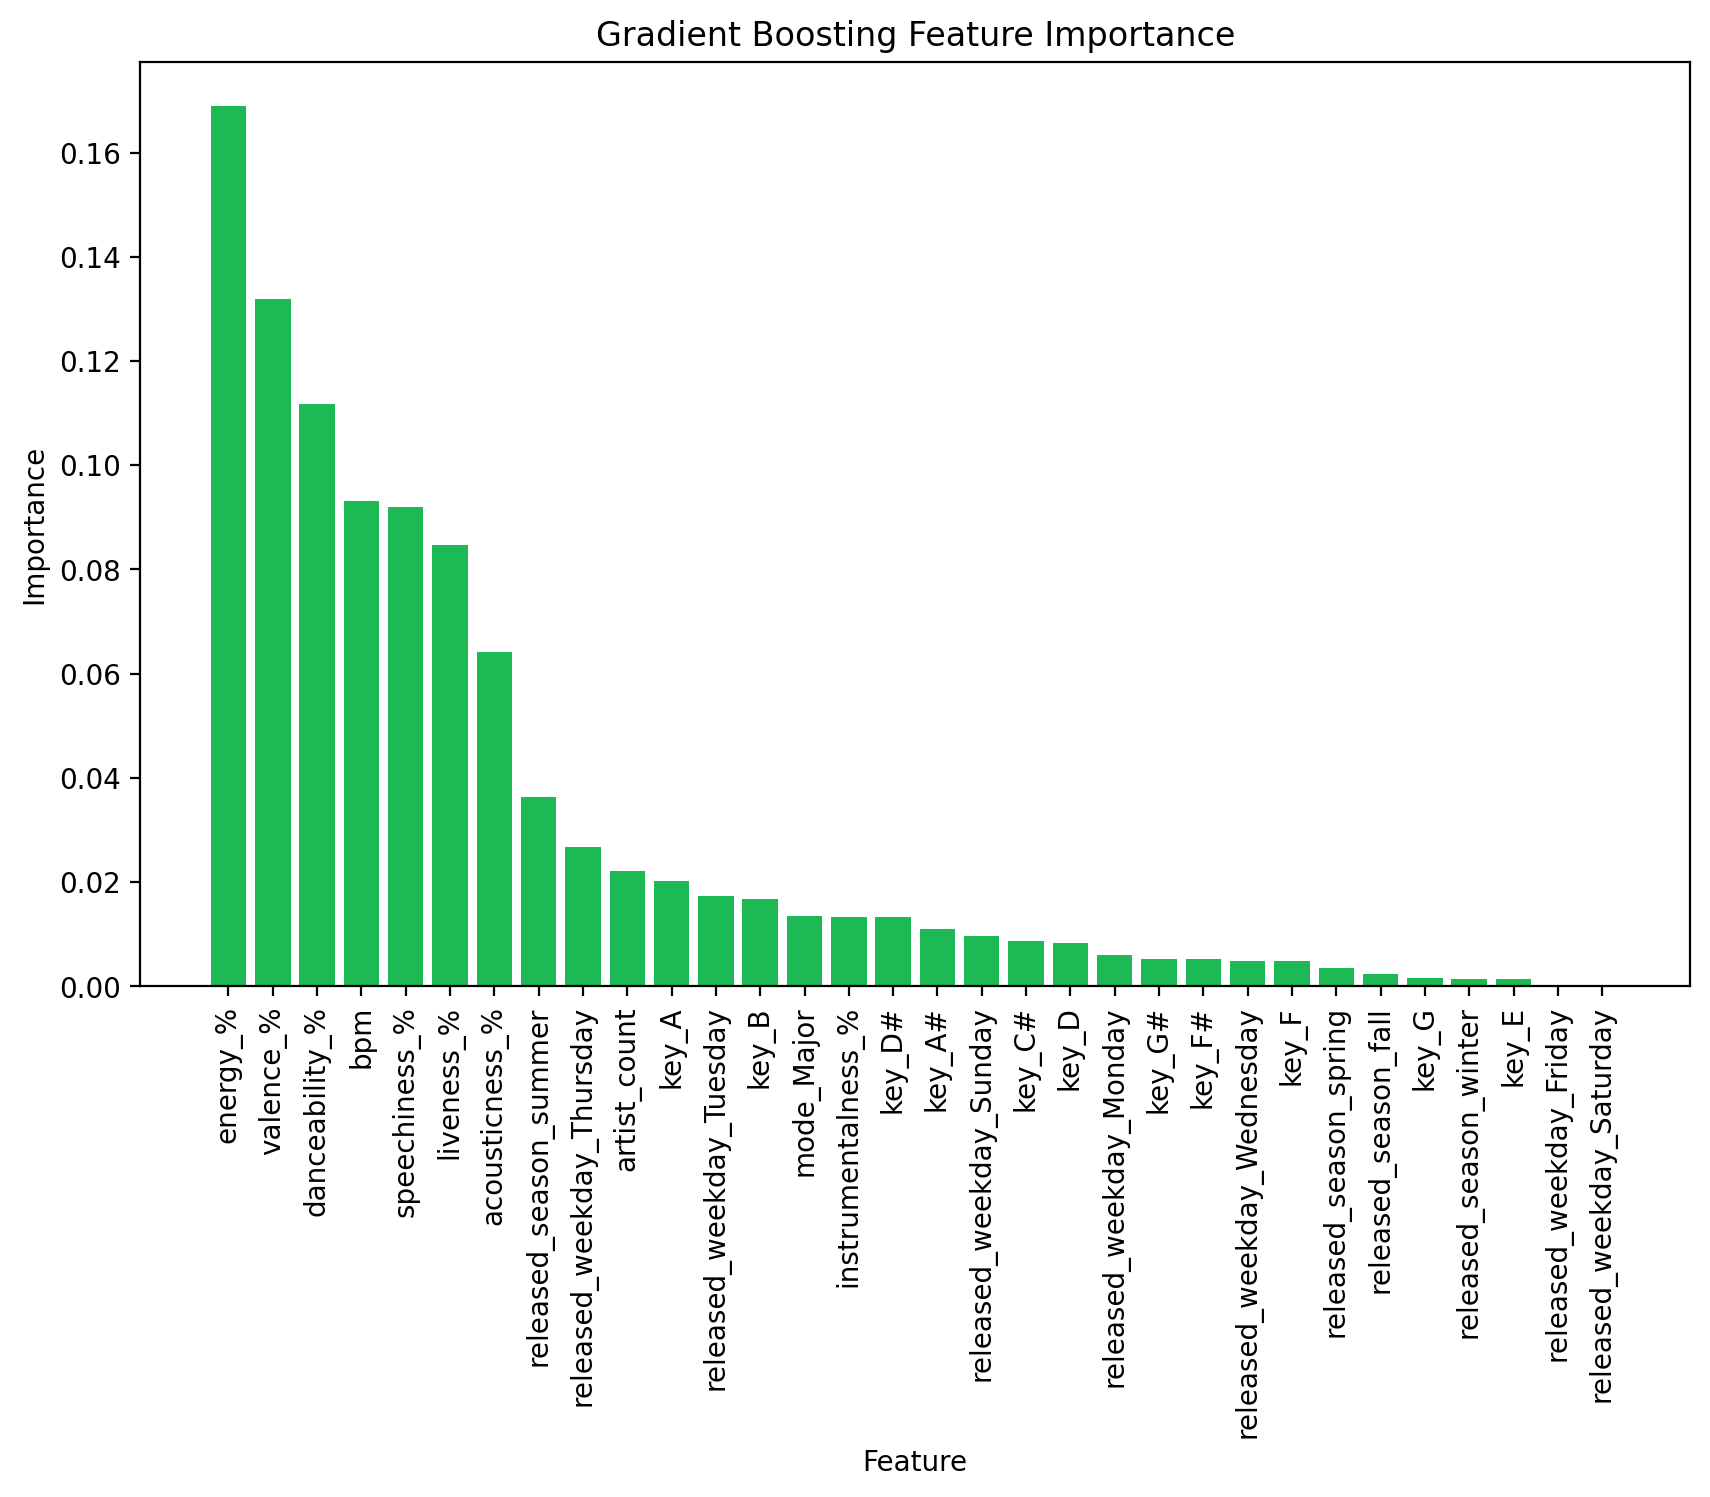

In [68]:
plt.figure(figsize=(10,6))
plt.bar(range(train_X.shape[1]), feature_importance[sorted_idx], align="center", color='#1DB954')
plt.xticks(range(train_X.shape[1]), df.drop(columns=['top_charts']).columns[sorted_idx], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Gradient Boosting Feature Importance")
plt.show()

 The features related to the mood and rhythm of the music ('energy %', 'valence %', 'danceability %') are the most important for the music. The song will also be succesfull if it is released in summer on Thursday. 

In [69]:
# Define the parameter grid
param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

# Create the GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier()

# Create the GridSearchCV object
grid_search_gb = GridSearchCV(estimator=gb_classifier, param_grid=param_grid_gb, cv=10, verbose=1, return_train_score=True)

# Perform the grid search on your data
grid_search_gb.fit(train_X, train_y)

# Print the results
print("Test set score GB: {:.4f}".format(grid_search_gb.score(test_X, test_y)))
print("Best parameters: {}".format(grid_search_gb.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_gb.best_score_))
print("Best estimator:\n{}".format(grid_search_gb.best_estimator_))
print('Accuracy on the testing set: {:.4f}'.format(grid_search_gb.best_estimator_.score(test_X, test_y)))


Fitting 10 folds for each of 27 candidates, totalling 270 fits
Test set score GB: 0.7456
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Best cross-validation score: 0.75
Best estimator:
GradientBoostingClassifier(learning_rate=0.01, n_estimators=50)
Accuracy on the testing set: 0.7456


In [70]:
# Create the GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(n_estimators=50, learning_rate=0.01, max_depth=3)

# Perform cross-validation
gb_cv_scores = cross_val_score(gb_classifier, X, y, cv=75)

# Print the mean accuracy
print("Accuracy:", gb_cv_scores.mean())

Accuracy: 0.7475757575757578


# Pruning

In [71]:
gradient_boosting_pruned = GradientBoostingClassifier(n_estimators=50, learning_rate=0.01, max_depth=3, random_state=123)
gradient_boosting_pruned.fit(train_X, train_y)


GradientBoostingClassifier(learning_rate=0.01, n_estimators=50,
                           random_state=123)

In [72]:
print("Gradient Boosting Classifier with Pruned Trees:")
print("Accuracy on the test set:", gradient_boosting_pruned.score(test_X, test_y))
print("Accuracy on the training set:", gradient_boosting_pruned.score(train_X, train_y))

Gradient Boosting Classifier with Pruned Trees:
Accuracy on the test set: 0.7455621301775148
Accuracy on the training set: 0.7481481481481481


In [73]:
decision_tree_pruned = DecisionTreeClassifier(max_depth=1, min_samples_split=5, min_samples_leaf=2, random_state=123)
decision_tree_pruned.fit(train_X, train_y)

# Model evaluation
print("Decision Tree Classifier with Pruning:")
print("Accuracy on the test set:", decision_tree_pruned.score(test_X, test_y))
print("Accuracy on the training set:", decision_tree_pruned.score(train_X, train_y))

Decision Tree Classifier with Pruning:
Accuracy on the test set: 0.7455621301775148
Accuracy on the training set: 0.7481481481481481


In [74]:
random_forest_pruned = RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_split=5, min_samples_leaf=2, random_state=123)
random_forest_pruned.fit(train_X, train_y)

# Model evaluation
print("Random Forest Classifier with Pruning:")
print("Accuracy on the test set:", random_forest_pruned.score(test_X, test_y))
print("Accuracy on the training set:", random_forest_pruned.score(train_X, train_y))

Random Forest Classifier with Pruning:
Accuracy on the test set: 0.7455621301775148
Accuracy on the training set: 0.7481481481481481


# Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [76]:
from sklearn.linear_model import LogisticRegression

# Create logistic regression object
logistic_regressor = LogisticRegression(max_iter=2000)

# Train the model using the training sets
logistic_regressor.fit(train_X, train_y)

print('Coefficients: \n', logistic_regressor.coef_)

# Accuracy
accuracy_train = logistic_regressor.score(train_X, train_y)
accuracy_test = logistic_regressor.score(test_X, test_y)
print('Accuracy (training):', accuracy_train)
print('Accuracy (testing):', accuracy_test)

Coefficients: 
 [[-1.86199060e-02  2.32875817e-03  1.02670961e-02  1.87776976e-03
  -1.71724084e-03 -2.01277934e-03 -5.59781375e-04 -7.98874983e-03
  -2.82306776e-02 -1.33826741e-01  2.50092040e-01 -6.96398191e-03
  -5.86684361e-01  4.37125460e-01  1.74178292e-01 -1.41777997e-01
  -3.51189612e-01 -1.51886338e-01  5.15123399e-01 -1.99047378e-02
  -9.33170067e-01  6.81396967e-02 -2.07003805e-01  3.62147604e-01
   4.12121558e-01 -8.73878227e-01 -5.25804862e-02  3.38797120e-01
   6.29899625e-02  4.07163924e-02 -2.54405208e-02 -1.73026903e-01]]
Accuracy (training): 0.7496296296296296
Accuracy (testing): 0.727810650887574


The accuracy of Logit is higher for training set and lower for test set in comparison with Gradient Boosting

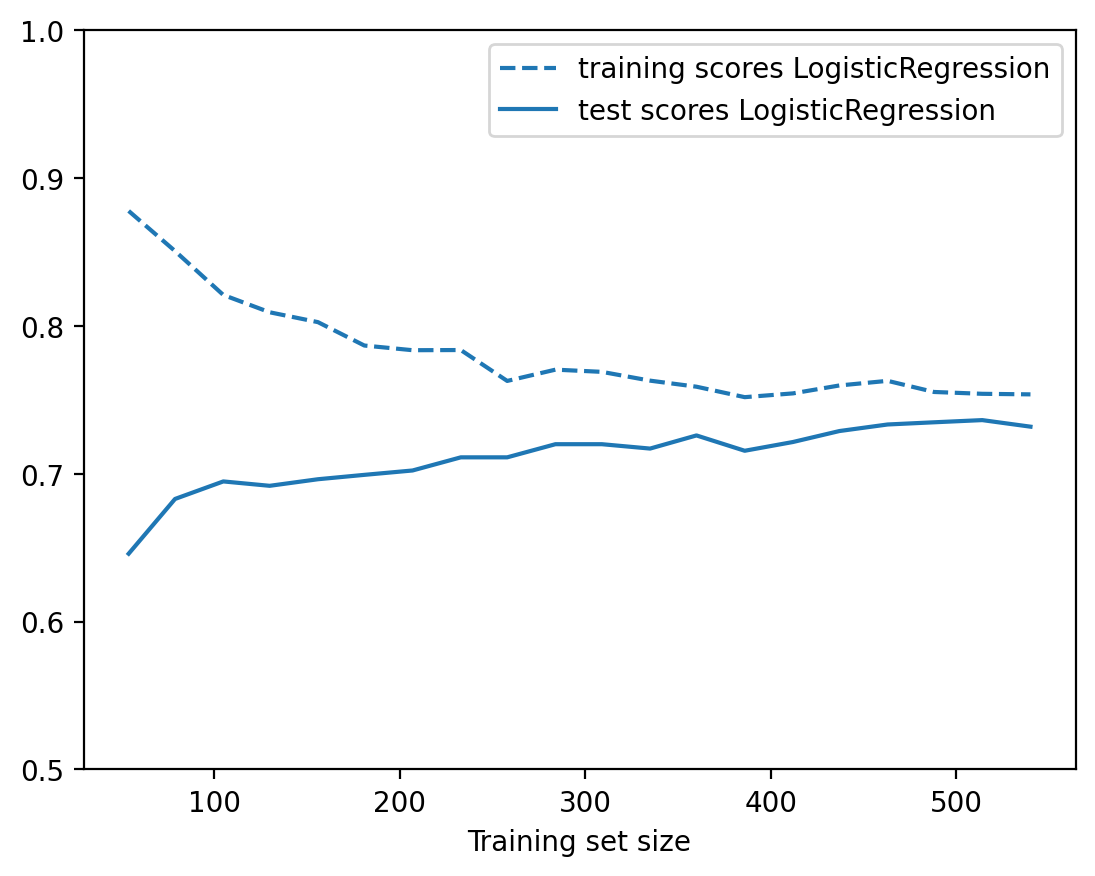

In [77]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(est, X, y):
    training_set_size, train_scores, test_scores = learning_curve(est, X, y, train_sizes=np.linspace(.1, 1, 20), cv=5)
    
    estimator_name = est.__class__.__name__
    
    line = plt.plot(training_set_size, train_scores.mean(axis=1), '--', label="training scores " + estimator_name)
    
    plt.plot(training_set_size, test_scores.mean(axis=1), '-', label="test scores " + estimator_name, c=line[0].get_color())
    plt.xlabel('Training set size')
    plt.legend(loc='best')
    plt.ylim(0.5, 1)

plt.figure()   
plot_learning_curve(LogisticRegression(max_iter=2000), train_X, train_y)

The learning curve for Logit shows that with increasing the number of used data the performance of the model on the training set decreases and performance of test set increases. We can find that the test accuracy sltabilizes on 0.7, so increasing the number of data will not lead to better performance. 

# Ridge

In [78]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression classifier with Ridge regularization
logistic_regression = LogisticRegression(penalty='l2', solver='liblinear', C=1.0)  # Adjust C (inverse of regularization strength) as needed
logistic_regression.fit(train_X, train_y)

# Model evaluation
print("Logistic Regression with Ridge Regularization:")
print("Accuracy on the test set:", logistic_regression.score(test_X, test_y))
print("Accuracy on the training set:", logistic_regression.score(train_X, train_y))

Logistic Regression with Ridge Regularization:
Accuracy on the test set: 0.727810650887574
Accuracy on the training set: 0.7481481481481481


We can see that accuracy of Logistic Regression with Ridge Regularization is almost the same as usual Logit.

# Lasso

We are going to use the Logistic Regression with Lasso technique 

In [80]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression classifier with Lasso regularization
logistic_regression_lasso = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)  # Adjust C (inverse of regularization strength) as needed
logistic_regression_lasso.fit(train_X, train_y)

# Model evaluation
print("Logistic Regression with Lasso Regularization:")
print("Accuracy on the test set:", logistic_regression_lasso.score(test_X, test_y))
print("Accuracy on the training set:", logistic_regression_lasso.score(train_X, train_y))


Logistic Regression with Lasso Regularization:
Accuracy on the test set: 0.727810650887574
Accuracy on the training set: 0.7481481481481481


We can see that accuracy of Logistic Regression with Lasso Regularization is almost the same as usual Logit.

Further we build Validation curves for models to see the changing  performance of a model with variations of a hyperparameter.

In [82]:
#Validation curves
from sklearn.model_selection import validation_curve
def optimize_with_validation_curve(classifier, title, ax, hyperparam):

    param_range = np.arange(1,20,1)      
    train_scores, test_scores = validation_curve(classifier, 
                                                 X, y, 
                                                 param_name=hyperparam, 
                                                 param_range=param_range, cv=10)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std  = np.std(train_scores, axis=1)
    test_scores_mean  = np.mean(test_scores, axis=1)
    test_scores_std   = np.std(test_scores, axis=1)

    ax.set_title("Validation Curve with " + title)
    ax.set_xlabel(hyperparam.replace('_', '').title())
    ax.set_ylabel("Score")
    lw = 2

    ax.plot(param_range, train_scores_mean, label="Training score",
                 color='blue', lw=lw)
    ax.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="blue", lw=lw)
    ax.plot(param_range, test_scores_mean, label="Testing score",
                 color=spotify_color, lw=lw)
    ax.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color=spotify_color, lw=lw)
    ax.legend(loc="best")


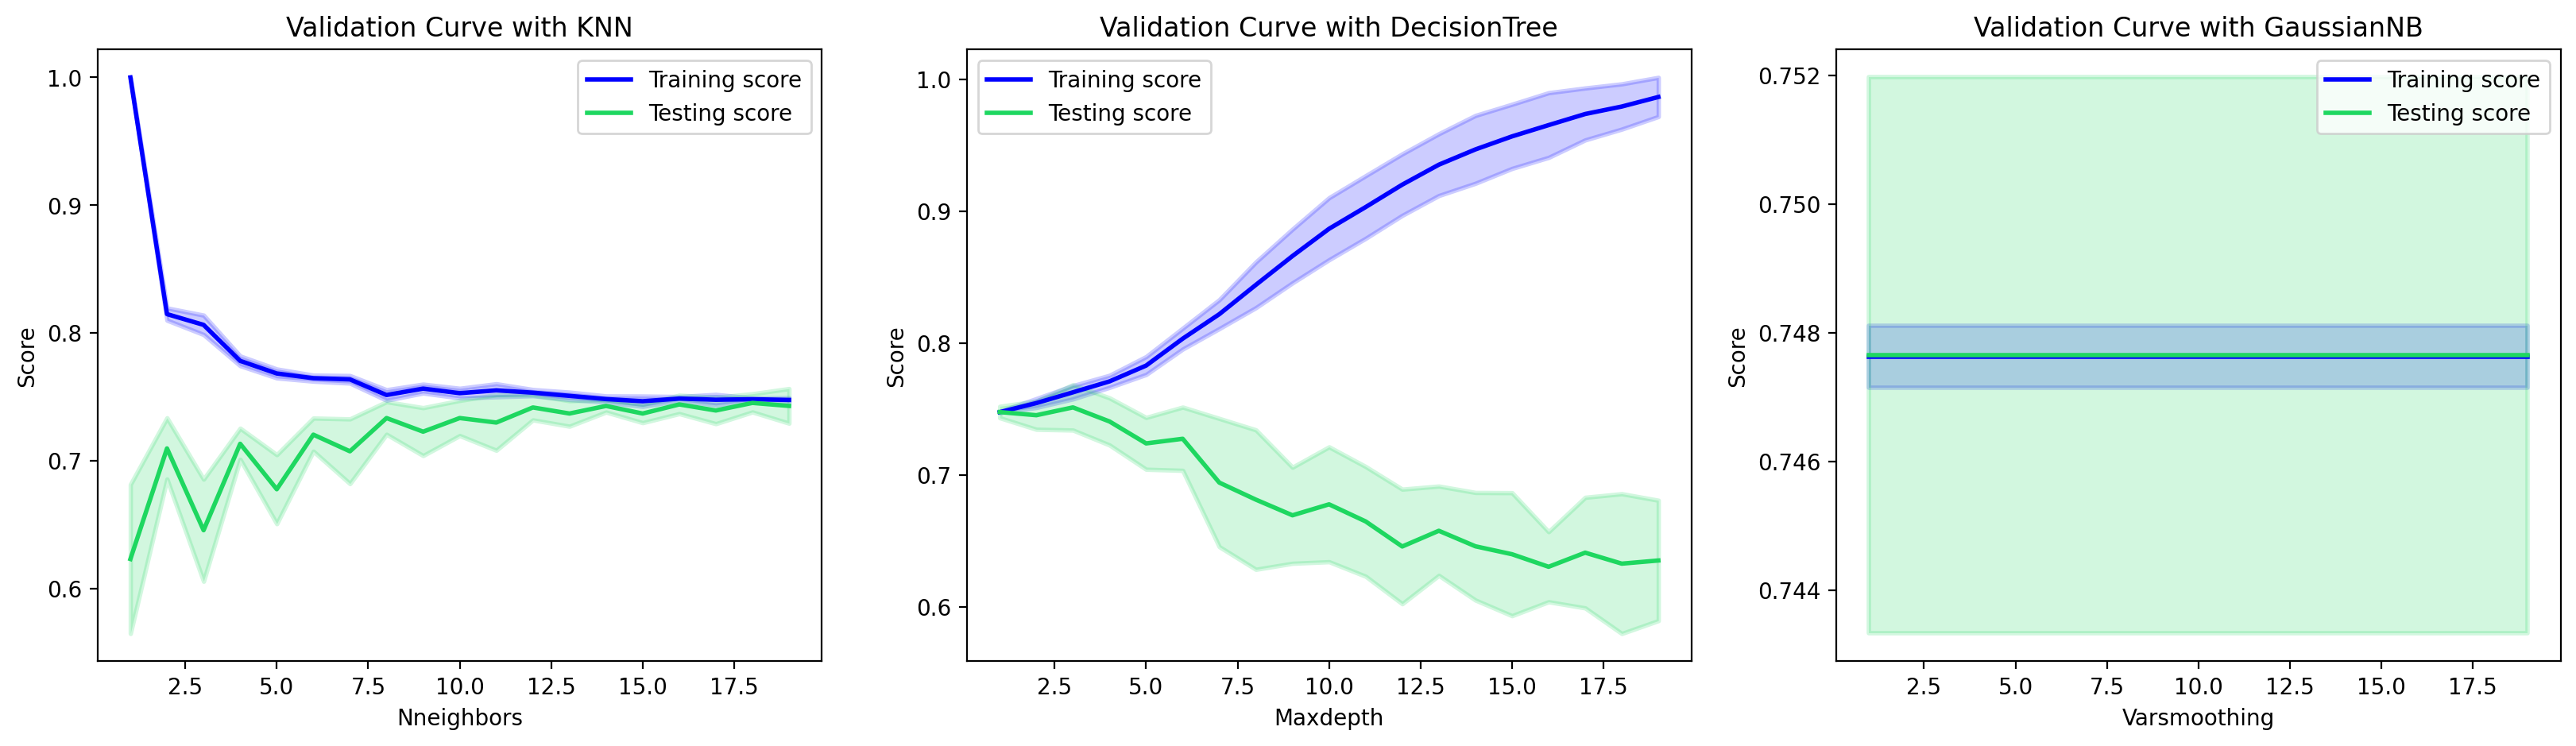

In [83]:
f, ax = plt.subplots(1, 3, figsize=(20, 5))

optimize_with_validation_curve(KNeighborsClassifier(), 'KNN', ax[0], 'n_neighbors')
optimize_with_validation_curve(DecisionTreeClassifier(), 'DecisionTree', ax[1], 'max_depth')
optimize_with_validation_curve(GaussianNB(), 'GaussianNB', ax[2], 'var_smoothing')

The Validation curve for Decision Tree shows that model predicts well in the lower maxdepth and then become worse in prediction, which means that we have teh case of overfitting of the model. So, with the increasing if hyperparameter the model becomes too complicated and fails in prediction. So we should choose lower hyperparameter which guarantees better result. The KNN demonstrates the opposite trend, so it shows the better results with increasing of hyperparameter. It demostrates underfitting of the model, so the model demonstrates poor performance in the beginning and then improves with increasing of hyperparameters. The increasing the size of dataset can improve the model. The Naive Bayse shows the case of underfitting. 

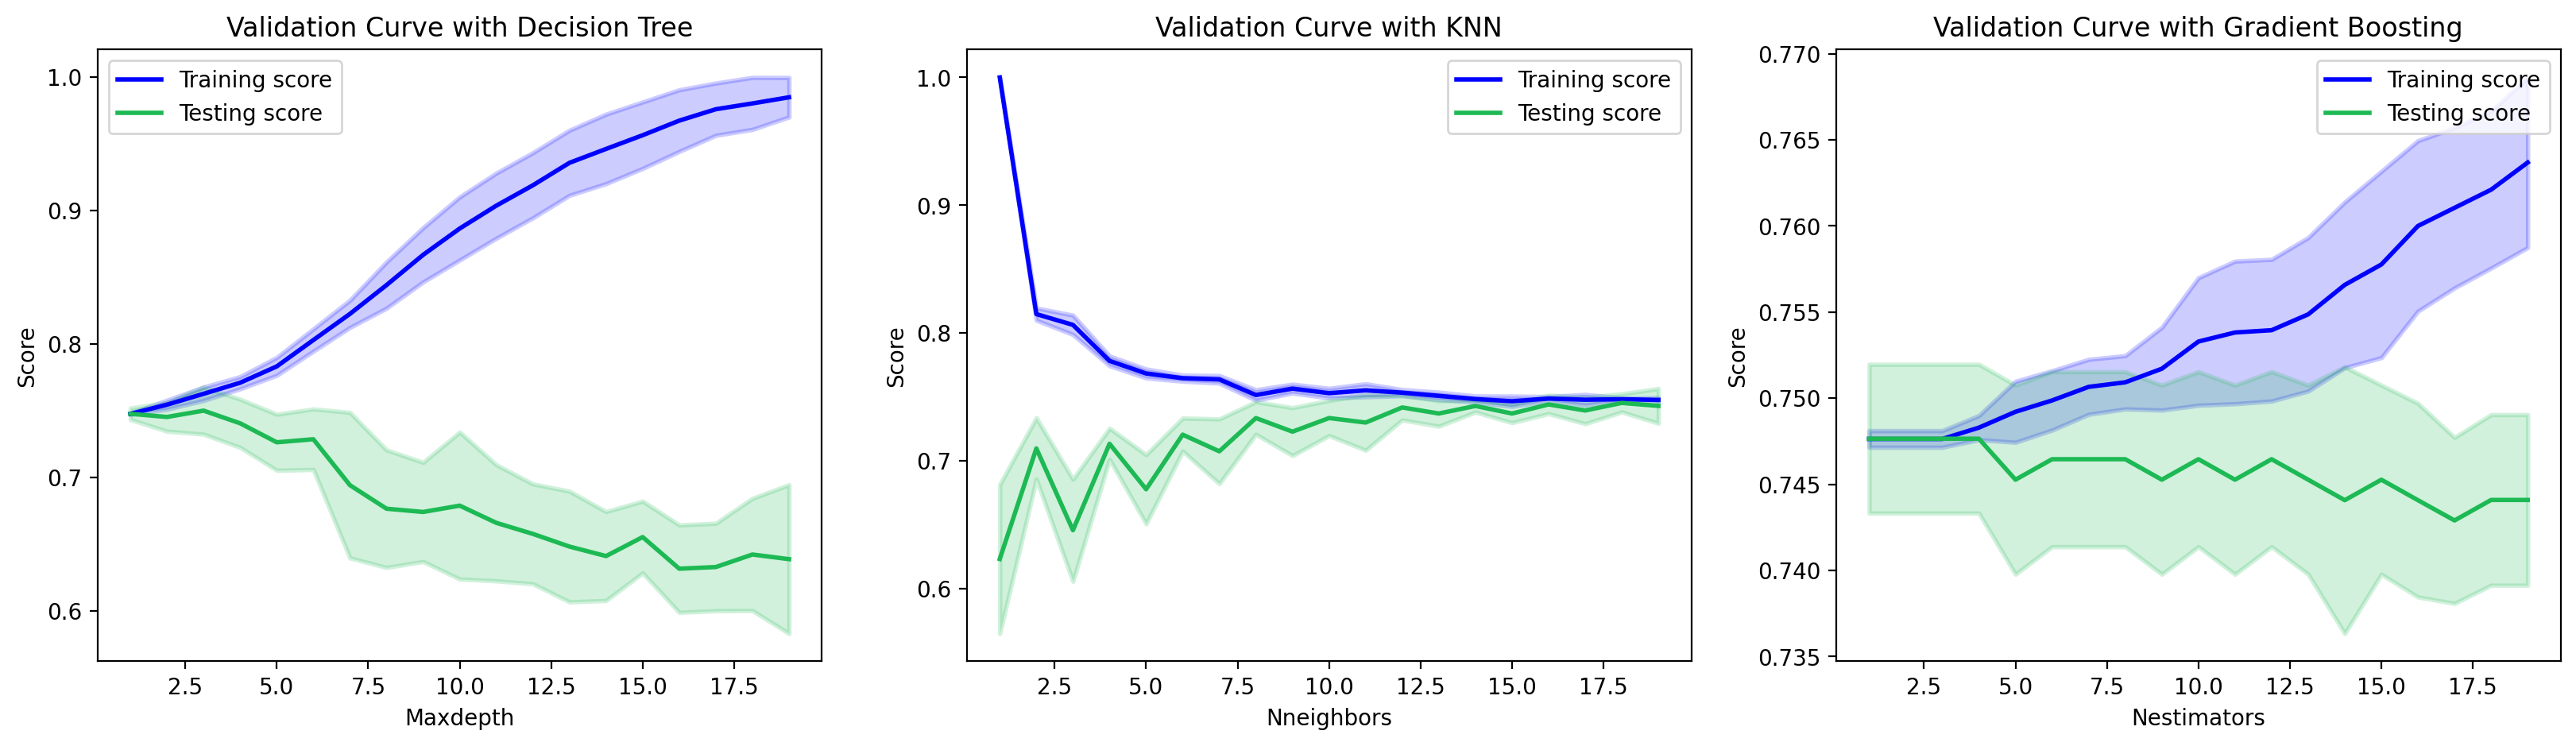

In [84]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

def optimize_with_validation_curve(classifier, title, ax, hyperparam):
    param_range = np.arange(1, 20, 1)  # Adjust the range according to the hyperparameter
    train_scores, test_scores = validation_curve(classifier, X, y, param_name=hyperparam, 
                                                 param_range=param_range, cv=10)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    ax.set_title("Validation Curve with " + title)
    ax.set_xlabel(hyperparam.replace('_', '').title())
    ax.set_ylabel("Score")
    lw = 2

    ax.plot(param_range, train_scores_mean, label="Training score",
            color='blue', lw=lw)
    ax.fill_between(param_range, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.2,
                    color="blue", lw=lw)
    ax.plot(param_range, test_scores_mean, label="Testing score",
            color='#1DB954', lw=lw)  # Spotify green color
    ax.fill_between(param_range, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha=0.2,
                    color='#1DB954', lw=lw)  # Spotify green color
    ax.legend(loc="best")

# Create subplots
f, ax = plt.subplots(1, 3, figsize=(20, 5))

# Optimization for Decision Tree
optimize_with_validation_curve(DecisionTreeClassifier(), 'Decision Tree', ax[0], 'max_depth')

# Optimization for KNN
optimize_with_validation_curve(KNeighborsClassifier(), 'KNN', ax[1], 'n_neighbors')

# Optimization for Gradient Boosting
optimize_with_validation_curve(GradientBoostingClassifier(), 'Gradient Boosting', ax[2], 'n_estimators')

plt.show()


The Validation curve for Decision Tree shows that model predicts well in the lower maxdepth and then become worse in prediction, which means that we have teh case of overfitting of the model. So, with the increasing if hyperparameter the model becomes too complicated and fails in prediction. So we should choose lower hyperparameter which guarantees better result. 
We can see the same trend for Gradient Boosting. 
The KNN demonstrates the opposite trend, so it shows the better results with increasing of hyperparameter. It demostrates underfitting of the model, so the model demonstrates poor performance in the beginning and then improves with increasing of hyperparameters. The increasing  the size of dataset can improve the model.







In [85]:
def evaluate_model(predictions, true_labels, model_name):
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions)
    auc_roc = roc_auc_score(true_labels, predictions)

    print(f"{model_name} Accuracy: {accuracy}")
    print(f"{model_name} Precision: {precision}")
    print(f"{model_name} Recall: {recall}")
    print(f"{model_name} F1-score: {f1}")
    print(f"{model_name} AUC-ROC: {auc_roc}\n")

Further we will compare the models and evaluate the performance of models and metrics such as precision, recall, and F1-score. 

In [86]:
#Comparing models

from sklearn.model_selection import cross_val_predict

dt_clf = DecisionTreeClassifier(max_depth=1, min_impurity_decrease=0.05, criterion= 'gini')
knn_clf = KNeighborsClassifier(n_neighbors=80,metric= 'manhattan' , weights= 'distance')
nb_clf = GaussianNB(var_smoothing= 0.0003511191734215131 )
rf_clf = RandomForestClassifier()
gb_clf = GradientBoostingClassifier()
lg_clf =LogisticRegression(penalty='l1', solver='liblinear', C=1.0)

# Performing cross-validation for each model
dt_scores = cross_val_score(dt_clf, X, y, cv=5, scoring='accuracy')
nb_scores = cross_val_score(nb_clf, X, y, cv=5, scoring='accuracy')
knn_scores = cross_val_score(knn_clf, X, y, cv=5, scoring='accuracy')
rf_scores = cross_val_score(rf_clf, X, y, cv=5, scoring='accuracy')
gb_scores = cross_val_score(gb_clf, X, y, cv=5, scoring='accuracy')
lg_scores = cross_val_score(lg_clf, X, y, cv=5, scoring='accuracy')

dt_y_pred = cross_val_predict(dt_clf, X, y, cv=5)
nb_y_pred = cross_val_predict(nb_clf, X, y, cv=5)
knn_y_pred = cross_val_predict(knn_clf, X, y, cv=5)
rf_y_pred = cross_val_predict(rf_clf, X, y, cv=5)
gb_y_pred = cross_val_predict(gb_clf, X, y, cv=5)
lg_y_pred = cross_val_predict(lg_clf, X, y, cv=5)

In [87]:
print("Decision Tree Results:")
print("Confusion Matrix:\n", confusion_matrix(y, dt_y_pred))
print("Classification Report:\n", classification_report(y, dt_y_pred, zero_division=1))

print("Naive Bayes Results:")
print("Confusion Matrix:\n", confusion_matrix(y, nb_y_pred))
print("Classification Report:\n", classification_report(y, nb_y_pred, zero_division=1))

print("K-Nearest Neighbors Results:")
print("Confusion Matrix:\n", confusion_matrix(y, knn_y_pred))
print("Classification Report:\n", classification_report(y, knn_y_pred, zero_division=1))

print("Random Forest Results:")
print("Confusion Matrix:\n", confusion_matrix(y, rf_y_pred))
print("Classification Report:\n", classification_report(y, rf_y_pred, zero_division=1))

print("Gradient Boosting Results:")
print("Confusion Matrix:\n", confusion_matrix(y, gb_y_pred))
print("Classification Report:\n", classification_report(y, gb_y_pred, zero_division=1))

print("Logit Results:")
print("Confusion Matrix:\n", confusion_matrix(y, lg_y_pred))
print("Classification Report:\n", classification_report(y, lg_y_pred, zero_division=1))


Decision Tree Results:
Confusion Matrix:
 [[631   0]
 [213   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86       631
           1       1.00      0.00      0.00       213

    accuracy                           0.75       844
   macro avg       0.87      0.50      0.43       844
weighted avg       0.81      0.75      0.64       844

Naive Bayes Results:
Confusion Matrix:
 [[581  50]
 [190  23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.92      0.83       631
           1       0.32      0.11      0.16       213

    accuracy                           0.72       844
   macro avg       0.53      0.51      0.49       844
weighted avg       0.64      0.72      0.66       844

K-Nearest Neighbors Results:
Confusion Matrix:
 [[630   1]
 [213   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0

The results of Confusion matrix demostrate that the Decision Tree classifier get an accuracy of 75%, however, it is not able to predict the class 1 correctly, so we have 0 recall class 1. Naive Bayes got an accuracy of 72% which is lower than in Desicion Tree, but it has predicted 32% of class 1 correctly, so it is better than Decision Tree classifier. KNN also has 75% of accuracy, but demostrated poor prediction of class 1 as Decision Tree classifier. The Random Forest shows 73% of accuracy and predicted 4% of class 1 correctly. Gradient Boosting has 72% accuracy and only 8% of class 1 were correctly predicted. Logistic Regression has 73% accuracy and predicted 4% of class 1 correctly. Therefore, we can summarize that Naive Bayes and Gradient Boosting are the best models for prediction. 
However, taking in account all results we can consider other types of preprocessing methods that can help to build models which will lead to better prediction. 

# Conclusion


The majority of the implemented models showed relatively good performance in terms of accuracy; however, only the Naive Bayes model was capable of accurately predicting outcomes for the first category of our target variable. Additionally, the features that pertain to the composition of the music, such as 'energy %', 'valence %', and 'danceability %', have been identified as the most significant predictors of a song's popularity. These features suggest that songs which are more suitable for dancing or that have a high energy level are more likely to become popular. This finding underscores the importance of these characteristics in determining a song's appeal and potential success in the market.